## Project Overview

The overview of the project is to use machine learning techniques to predict soil moisture profiles at different depths from rainfall events, soil temperature, humidity, air temperature and other soil properties. The data for the project was measured with measuring instruments from different stations in the University of Hull. 

First we start by importing the necessary libraries we will be needing to run our codes on python

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.min_rows", 200)
pd.set_option("display.max_columns", None)
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

Next, we will be reading our data stored in CSV file format using pandas. The stations where the dataset datapoints were gathered from for this project include:

* Newland
* Salmon
* Wilberforce001

In [2]:
newland = pd.read_csv("newland.csv",encoding ='unicode_escape')
salmon = pd.read_csv("salmon.csv",encoding ='unicode_escape')
wilberforce001 = pd.read_csv(r"C:\Users\User 1\Wilberforce001.csv",encoding ='unicode_escape')

The data loggers were recorded from Dec 2021. However, for most of the stations, data were not recorded until much later. Therefore we had alot of missing datapoints.

## DATA CLEANING AND PREPARATION

## NEWLAND STATION

In [3]:
#checking the shape of newland station dataset
newland.shape

(58288, 17)

The output above shows that the dataset contains 58288 rows and 17 columns

In [4]:
#checking the sum of missing datapoints for newland station
newland.isnull().sum()

Date & Time                       0
Rain - mm                      1359
Rain Rate - mm/h               1359
Soil Moisture 10 cm - %        1361
Soil Moisture 20 cm - %        1361
Soil Moisture 30 cm - %        1361
Soil Moisture 40 cm - %        1361
Soil Moisture 50 cm - %        1361
Soil Moisture 60 cm - %        1361
Soil Temperature 10 cm - °C    1361
Soil Temperature 20 cm - °C    1361
Soil Temperature 30 cm - °C    1361
Soil Temperature 40 cm - °C    1361
Soil Temperature 50 cm - °C    1361
Soil Temperature 60 cm - °C    1361
Air Temp - °C                  1144
Humidity - %                   1144
dtype: int64

The output above shows the number of missing data points in newland dataset. We will be working on cleaning the data to enable us carry out further analysis and data preparation for modelling.

To fill the missing values, I decided to use linear interpolation method. It is a simple method used to estimate missing values with the help of the neighbours. It facilitates the construction of new data points within the bounds of a discrete group of already established data points.

In [5]:
newland["Rain - mm"] = newland["Rain - mm"].interpolate(method = "linear")
newland["Rain Rate - mm/h"] = newland["Rain Rate - mm/h"].interpolate(method = "linear")
newland["Soil Moisture 10 cm - %"] = newland["Soil Moisture 10 cm - %"].interpolate(method = "linear")
newland["Soil Moisture 20 cm - %"] = newland["Soil Moisture 20 cm - %"].interpolate(method = "linear")
newland["Soil Moisture 30 cm - %"] = newland["Soil Moisture 30 cm - %"].interpolate(method = "linear")
newland["Soil Moisture 40 cm - %"] = newland["Soil Moisture 40 cm - %"].interpolate(method = "linear")
newland["Soil Moisture 50 cm - %"] = newland["Soil Moisture 50 cm - %"].interpolate(method = "linear")
newland["Soil Moisture 60 cm - %"] = newland["Soil Moisture 60 cm - %"].interpolate(method = "linear")
newland["Soil Temperature 10 cm - °C"] = newland["Soil Temperature 10 cm - °C"].interpolate(method = "linear")
newland["Soil Temperature 20 cm - °C"] = newland["Soil Temperature 20 cm - °C"].interpolate(method = "linear")
newland["Soil Temperature 30 cm - °C"] = newland["Soil Temperature 30 cm - °C"].interpolate(method = "linear")
newland["Soil Temperature 40 cm - °C"] = newland["Soil Temperature 40 cm - °C"].interpolate(method = "linear")
newland["Soil Temperature 50 cm - °C"] = newland["Soil Temperature 50 cm - °C"].interpolate(method = "linear")
newland["Soil Temperature 60 cm - °C"] = newland["Soil Temperature 60 cm - °C"].interpolate(method = "linear")
newland["Air Temp - °C"] = newland["Air Temp - °C"].interpolate(method = "linear")
newland["Humidity - %"] = newland["Humidity - %"].interpolate(method = "linear")

Next, we convert the date column to date-time format

In [6]:
newland["Date & Time"] = pd.to_datetime(newland["Date & Time"], dayfirst = True)

In [7]:
#printing the first five rows
newland.head()

,Date & Time,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
0,2021-12-10 11:00:00,0.0,0.0,20.2,36.8,38.3,38.6,43.8,46.9,6.4,7.1,7.9,7.7,7.9,8.6,5.3,75.9
1,2021-12-10 11:05:00,0.0,0.0,20.2,36.8,38.3,38.6,43.8,47.0,6.3,7.0,7.9,7.8,8.0,8.6,5.3,75.7
2,2021-12-10 11:10:00,0.0,0.0,20.2,36.8,38.3,38.6,43.8,47.1,6.3,7.0,7.9,7.8,8.0,8.6,5.4,75.5
3,2021-12-10 11:15:00,0.0,0.0,20.2,36.8,38.3,38.6,43.9,47.1,6.3,7.0,7.9,7.8,8.0,8.6,5.4,75.2
4,2021-12-10 11:20:00,0.0,0.0,20.2,36.8,38.4,38.6,43.9,47.2,6.3,7.0,7.9,7.9,8.1,8.6,5.4,75.0


In [8]:
#rechecking the sum of missing datapoints for newland station
newland.isnull().sum()

Date & Time                    0
Rain - mm                      0
Rain Rate - mm/h               0
Soil Moisture 10 cm - %        0
Soil Moisture 20 cm - %        0
Soil Moisture 30 cm - %        0
Soil Moisture 40 cm - %        0
Soil Moisture 50 cm - %        0
Soil Moisture 60 cm - %        0
Soil Temperature 10 cm - °C    0
Soil Temperature 20 cm - °C    0
Soil Temperature 30 cm - °C    0
Soil Temperature 40 cm - °C    0
Soil Temperature 50 cm - °C    0
Soil Temperature 60 cm - °C    0
Air Temp - °C                  0
Humidity - %                   0
dtype: int64

# SALMON STATION

In [9]:
#checking the shape of salmon station dataset
salmon.shape

(60597, 17)

The output above shows that the dataset contains 60597 rows and 17 columns

In [10]:
#checking the sum of missing datapoints for salmon station
salmon.isnull().sum()

Date & Time                       0
Rain - mm                      2711
Rain Rate - mm/h               2711
Soil Moisture 10 cm - %        3131
Soil Moisture 20 cm - %        3131
Soil Moisture 30 cm - %        3131
Soil Moisture 40 cm - %        3131
Soil Moisture 50 cm - %        3131
Soil Moisture 60 cm - %        3131
Soil Temperature 10 cm - °C    3131
Soil Temperature 20 cm - °C    3131
Soil Temperature 30 cm - °C    3131
Soil Temperature 40 cm - °C    3131
Soil Temperature 50 cm - °C    3131
Soil Temperature 60 cm - °C    3131
Air Temp - °C                  1145
Humidity - %                   1145
dtype: int64

The output above shows the number of missing data points in salmon dataset. We will be working on cleaning the data to enable us carry out further analysis and data preparation for modelling.

To fill the missing values, I decided to also use linear interpolation method. It is a simple method used to estimate missing values with the help of the neighbours

In [11]:
salmon["Rain - mm"] = salmon["Rain - mm"].interpolate(method = "linear")
salmon["Rain Rate - mm/h"] = salmon["Rain Rate - mm/h"].interpolate(method = "linear")
salmon["Soil Moisture 10 cm - %"] = salmon["Soil Moisture 10 cm - %"].interpolate(method = "linear")
salmon["Soil Moisture 20 cm - %"] = salmon["Soil Moisture 20 cm - %"].interpolate(method = "linear")
salmon["Soil Moisture 30 cm - %"] = salmon["Soil Moisture 30 cm - %"].interpolate(method = "linear")
salmon["Soil Moisture 40 cm - %"] = salmon["Soil Moisture 40 cm - %"].interpolate(method = "linear")
salmon["Soil Moisture 50 cm - %"] = salmon["Soil Moisture 50 cm - %"].interpolate(method = "linear")
salmon["Soil Moisture 60 cm - %"] = salmon["Soil Moisture 60 cm - %"].interpolate(method = "linear")
salmon["Soil Temperature 10 cm - °C"] = salmon["Soil Temperature 10 cm - °C"].interpolate(method = "linear")
salmon["Soil Temperature 20 cm - °C"] = salmon["Soil Temperature 20 cm - °C"].interpolate(method = "linear")
salmon["Soil Temperature 30 cm - °C"] = salmon["Soil Temperature 30 cm - °C"].interpolate(method = "linear")
salmon["Soil Temperature 40 cm - °C"] = salmon["Soil Temperature 40 cm - °C"].interpolate(method = "linear")
salmon["Soil Temperature 50 cm - °C"] = salmon["Soil Temperature 50 cm - °C"].interpolate(method = "linear")
salmon["Soil Temperature 60 cm - °C"] = salmon["Soil Temperature 60 cm - °C"].interpolate(method = "linear")
salmon["Air Temp - °C"] = salmon["Air Temp - °C"].interpolate(method = "linear")
salmon["Humidity - %"] = salmon["Humidity - %"].interpolate(method = "linear")

Next, we convert the date column to date-time format

In [12]:
salmon["Date & Time"] = pd.to_datetime(salmon["Date & Time"], dayfirst = True)

In [13]:
#printing the first five rows
salmon.head()

,Date & Time,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
0,2021-12-02 10:35:00,0.2,0.0,46.7,32.5,37.7,45.1,43.2,46.4,7.4,8.3,9.2,9.4,9.9,10.2,1.7,87.1
1,2021-12-02 10:40:00,0.0,0.0,46.7,32.6,37.8,45.1,43.2,46.4,7.4,8.3,9.3,9.4,9.9,10.2,1.7,86.3
2,2021-12-02 10:45:00,0.2,1.2,46.7,32.7,37.9,45.2,43.2,46.4,7.4,8.2,9.2,9.4,9.8,10.1,1.8,85.2
3,2021-12-02 10:50:00,0.0,0.0,46.7,32.8,37.9,45.3,43.3,46.4,7.4,8.2,9.2,9.4,9.8,10.2,1.8,84.5
4,2021-12-02 10:55:00,0.2,0.0,46.7,32.9,38.0,45.3,43.3,46.4,7.4,8.2,9.2,9.4,9.9,10.1,1.9,83.8


In [14]:
#rechecking the sum of missing datapoints for salmon station to check if properly cleaned
salmon.isnull().sum()

Date & Time                    0
Rain - mm                      0
Rain Rate - mm/h               0
Soil Moisture 10 cm - %        0
Soil Moisture 20 cm - %        0
Soil Moisture 30 cm - %        0
Soil Moisture 40 cm - %        0
Soil Moisture 50 cm - %        0
Soil Moisture 60 cm - %        0
Soil Temperature 10 cm - °C    0
Soil Temperature 20 cm - °C    0
Soil Temperature 30 cm - °C    0
Soil Temperature 40 cm - °C    0
Soil Temperature 50 cm - °C    0
Soil Temperature 60 cm - °C    0
Air Temp - °C                  0
Humidity - %                   0
dtype: int64

## WILBERFORCE001

In [15]:
#checking the shape of wilberforce001 station dataset
wilberforce001.shape

(58815, 17)

The output above shows that the dataset contains 58815 rows and 17 columns

In [16]:
#checking the sum of missing datapoints for wilberforce001 station
wilberforce001.isnull().sum()

Date & Time                       0
Rain - mm                      1292
Rain Rate - mm/h               1292
Soil Moisture 10 cm - %        1292
Soil Moisture 20 cm - %        1292
Soil Moisture 30 cm - %        1292
Soil Moisture 40 cm - %        1292
Soil Moisture 50 cm - %        1292
Soil Moisture 60 cm - %        1292
Soil Temperature 10 cm - °C    1292
Soil Temperature 20 cm - °C    1292
Soil Temperature 30 cm - °C    1292
Soil Temperature 40 cm - °C    1292
Soil Temperature 50 cm - °C    1292
Soil Temperature 60 cm - °C    1292
Air Temp - °C                  1144
Humidity - %                   1144
dtype: int64

The output above shows the number of missing data points in wilberforce001 dataset. We will be working on cleaning the data to enable us carry out further analysis and data preparation for modelling.

To fill the missing values, I decided to use linear interpolation method. It is a simple method used to estimate missing values with the help of the neighbours

In [17]:
wilberforce001["Rain - mm"] = wilberforce001["Rain - mm"].interpolate(method = "linear")
wilberforce001["Rain Rate - mm/h"] = wilberforce001["Rain Rate - mm/h"].interpolate(method = "linear")
wilberforce001["Soil Moisture 10 cm - %"] = wilberforce001["Soil Moisture 10 cm - %"].interpolate(method = "linear")
wilberforce001["Soil Moisture 20 cm - %"] = wilberforce001["Soil Moisture 20 cm - %"].interpolate(method = "linear")
wilberforce001["Soil Moisture 30 cm - %"] = wilberforce001["Soil Moisture 30 cm - %"].interpolate(method = "linear")
wilberforce001["Soil Moisture 40 cm - %"] = wilberforce001["Soil Moisture 40 cm - %"].interpolate(method = "linear")
wilberforce001["Soil Moisture 50 cm - %"] = wilberforce001["Soil Moisture 50 cm - %"].interpolate(method = "linear")
wilberforce001["Soil Moisture 60 cm - %"] = wilberforce001["Soil Moisture 60 cm - %"].interpolate(method = "linear")
wilberforce001["Soil Temperature 10 cm - °C"] = wilberforce001["Soil Temperature 10 cm - °C"].interpolate(method = "linear")
wilberforce001["Soil Temperature 20 cm - °C"] = wilberforce001["Soil Temperature 20 cm - °C"].interpolate(method = "linear")
wilberforce001["Soil Temperature 30 cm - °C"] = wilberforce001["Soil Temperature 30 cm - °C"].interpolate(method = "linear")
wilberforce001["Soil Temperature 40 cm - °C"] = wilberforce001["Soil Temperature 40 cm - °C"].interpolate(method = "linear")
wilberforce001["Soil Temperature 50 cm - °C"] = wilberforce001["Soil Temperature 50 cm - °C"].interpolate(method = "linear")
wilberforce001["Soil Temperature 60 cm - °C"] = wilberforce001["Soil Temperature 60 cm - °C"].interpolate(method = "linear")
wilberforce001["Air Temp - °C"] = wilberforce001["Air Temp - °C"].interpolate(method = "linear")
wilberforce001["Humidity - %"] = wilberforce001["Humidity - %"].interpolate(method = "linear")

In [18]:
#Next, we convert the date column to date-time format
wilberforce001["Date & Time"] = pd.to_datetime(wilberforce001["Date & Time"], dayfirst = True)

In [19]:
#printing the first five rows
wilberforce001.head()

,Date & Time,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
0,2021-12-08 15:05:00,0.0,0.0,18.1,19.9,33.0,41.0,43.2,46.1,6.2,6.2,6.5,6.2,6.8,7.0,7.0,81.2
1,2021-12-08 15:10:00,0.0,0.0,18.2,20.0,33.1,41.2,43.3,46.2,6.1,6.2,6.5,6.3,7.0,7.0,6.9,81.2
2,2021-12-08 15:15:00,0.0,0.0,18.2,20.1,33.2,41.3,43.5,46.3,5.9,6.1,6.5,6.4,7.0,7.1,6.9,81.1
3,2021-12-08 15:20:00,0.0,0.0,18.2,20.2,33.3,41.4,43.6,46.4,6.0,6.1,6.5,6.4,7.0,7.2,6.9,81.8
4,2021-12-08 15:25:00,0.0,0.0,38.6,51.8,49.0,49.9,48.7,48.8,6.4,6.3,6.3,5.6,5.8,5.6,6.8,82.7


In [20]:
#rechecking the sum of missing datapoints for wilberforce station to ascertain if properly cleaned
wilberforce001.isnull().sum()

Date & Time                    0
Rain - mm                      0
Rain Rate - mm/h               0
Soil Moisture 10 cm - %        0
Soil Moisture 20 cm - %        0
Soil Moisture 30 cm - %        0
Soil Moisture 40 cm - %        0
Soil Moisture 50 cm - %        0
Soil Moisture 60 cm - %        0
Soil Temperature 10 cm - °C    0
Soil Temperature 20 cm - °C    0
Soil Temperature 30 cm - °C    0
Soil Temperature 40 cm - °C    0
Soil Temperature 50 cm - °C    0
Soil Temperature 60 cm - °C    0
Air Temp - °C                  0
Humidity - %                   0
dtype: int64

# CREATING FUNCTIONS

## Function 1

We will be creating a function called "split_data". The function covers the following data preprocessing processes:
1. Selecting the features and target from the dataset
2. Spliting the data into training and test sets
3. Normalizing of the dataset

In [21]:
def split_data(data):
    
    """
    split data function:

    data: dataframe from the station
    x_train, x_test, y_train, y_test: Output after spliting the dataset into
    training and testing sets 
    
    """
    
    #selecting the names of the target variables 
    #The target variables for the project are the soil moisture at different depths
    
    target = ["Soil Moisture 10 cm - %", "Soil Moisture 20 cm - %", "Soil Moisture 30 cm - %", 
                      "Soil Moisture 40 cm - %", "Soil Moisture 50 cm - %", "Soil Moisture 60 cm - %"]
    
    #get the features and the target
    features = data.drop(target, axis = 1).values
    label = data[target].values  
    
    #split the data into test and training datasets
    x_train,x_test,y_train,y_test = train_test_split(features, label, test_size=0.2, random_state=0)
    
    #normalizing the data
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    return x_train, x_test, y_train, y_test

## Function 2 (Basic Regression ML Modelling)

Here, we will be creating a function called "trad_modelling". The function covers the following processes:
1. Instantiating and fitting the model
2. Using the model to predict x_test
3. Evaluating the model using mse, mae, rmse and r2

* MSE means the "mean squared error" of the model
* MAE means the "mean absolute error" of the model
* RMSE means "root mean square error" of the model
* R2 means "r-squared score"

In [22]:
def trad_modelling (model_name, x_train, x_test, y_train, y_test):
        
    """
    Basic regression ML modelling

    model name: calling the model algorithm
    x_train, x_test, y_train, y_test: the training and testing sets of the data
    mse: refers to the mean square error of the model on the test dataset
    mae: refers to the mean absolute error of the model on the test dataset
    rmse: refers to the root mean square error of the model on the test dataset
    r2: refers to the correlation coefficient, how much variance in dependent variable can be accounted for by the model
    model: this refers to the trained model after training with the training dataset
    """
    
    #create an instance of the model
    model = model_name
    
    #fitting the model
    model.fit(x_train, y_train)
    
    #predicting the x_test
    y_pred = model.predict(x_test)
       
    #get the mse, mae, rmse and r2    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    
    return mse, mae, rmse, r2, model

## Function 3 (Deep Neural Regression Model)

Here, we will be creating a function called "deep_neural_regression". The function covers the following processes:
1. Building a deep neural regression model
2. Using the model to predict x_test
3. Evaluating the model using mse, mae, rmse and r2

In [23]:
def deep_neural_regression(x_train, y_train, x_test, y_test):
    
    
    """
    Deep Neural Regression Model

    x_train, x_test, y_train, y_test: the training and testing sets of the data
    mse_neural: refers to the mean square error of the model on the test dataset
    mae_neural: refers to the mean absolute error of the model on the test dataset
    rmse_neural: refers to the root mean square error of the model on the test dataset
    r2_neural: refers to the correlation coefficient, how much variance in dependent variable can be accounted for by the model
    model: this refers to the trained model after training with the training dataset
    history: refers to the training history of the model
    """
    
    
    #define the model
    model = Sequential()
    model.add(Dense(128, input_dim= x_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    #Output layer
    model.add(Dense(6, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    model.summary()

    history = model.fit(x_train, y_train, validation_split=0.2, epochs = 20)
    
    predictions_dn = model.predict(x_test)
    
    mse_neural, mae_neural = model.evaluate(x_test, y_test)
    r2_neural = r2_score(y_test,predictions_dn)
    rmse_neural = np.sqrt(mse_neural)
    
    return mse_neural, mae_neural, history, r2_neural, rmse_neural, model

# MODEL BUILDING FOR THE STATIONS

In this session, we will be building models using each of the stations by applying the above created functions. We will then evaluate the models further by using some evaluation metrics such as mean square error, mean absolute error, r squared and root mean square error.

# WORKING ON NEWLAND DATASET

In [24]:
newland.head(2)

,Date & Time,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
0,2021-12-10 11:00:00,0.0,0.0,20.2,36.8,38.3,38.6,43.8,46.9,6.4,7.1,7.9,7.7,7.9,8.6,5.3,75.9
1,2021-12-10 11:05:00,0.0,0.0,20.2,36.8,38.3,38.6,43.8,47.0,6.3,7.0,7.9,7.8,8.0,8.6,5.3,75.7


In [25]:
#setting the "Date & Time" as index
newland.set_index("Date & Time", inplace = True)

### Applying the split_data function

Here, we apply the "split_data" function. The function separates the newland dataset into features and target variables, splits the data into test and training datasets and normalize the data.

In [26]:
#Spliting the data into training and test datasets by applying the split_data function
x_train1, x_test1, y_train1, y_test1 = split_data (newland)

## (A) MULTIPLE LINEAR REGRESSION

#### 1. Applying the trad_modelling function for multiple linear regression

Here, we will be applying the "trad_modelling" function for our multiple linear regression. The function instantiates the model, predicts the y_pred, and evaluates the model using evaluation metrics.

In [27]:
mse_lr1, mae_lr1, rmse_lr1, r2_lr1, model_lr1 = trad_modelling (LinearRegression(), x_train1, x_test1, y_train1, y_test1)

In [28]:
#printing the mse, mae, rmse and r2 values from the multiple linear regression model on the test dataset

print(mse_lr1)
print(mae_lr1)
print(r2_lr1)
print(rmse_lr1)

5.2741662210295095
1.4521582935643849
0.6494063368344635
2.296555294572615


## (B) RANDOM FOREST REGRESSION

#### 2. Applying the trad_modelling function for random forest regression

Here, we will be applying the "trad_modelling" function to build our random forest regression. The function instantiates the model, predicts the y_pred and evaluate the model using some evaluation metrics.

In [29]:
mse_rf1, mae_rf1, rmse_rf1, r2_rf1, model_rf1 = trad_modelling (RandomForestRegressor(), x_train1, x_test1, y_train1, y_test1)

In [30]:
#printing the mse, mae, rmse and r2 values from the random forest regression model on the test dataset

print(mse_rf1)
print(mae_rf1)
print(r2_rf1)
print(rmse_rf1)

0.015249790365782674
0.026970915802064666
0.9983906764894552
0.12349004156523179


# (C) DECISION TREE REGRESSION

#### 3. Applying the trad_modelling function for decision tree regression

Here, we will be applying the "function" 2 called "trad_modelling" function for decision tree regression. The function instantiates the model, predicts the y_pred and evaluate the model using some evaluation metrics.

In [31]:
mse_dt1, mae_dt1, rmse_dt1, r2_dt1, model_dt1 = trad_modelling (DecisionTreeRegressor(), x_train1, x_test1, y_train1, y_test1)

In [32]:
#printing the mse, mae, rmse and r2 values from the decision tree regression model on the test dataset

print(mse_dt1)
print(mae_dt1)
print(r2_dt1)
print(rmse_dt1)

0.0333842653676555
0.026119502942879232
0.996673613561721
0.18271361571501862


# (D) DEEP NEURAL REGRESSION 

#### 4. Applying the deep_neural_regression function for deep neural regression

Here, we will be applying the "function 3" called "deep_neural_regression" function for deep neural regression. The function builds the model, predicts the y_pred using deep neural regression model and also evaluate the model using some evaluation metrics.

In [33]:
mse_neuraln1, mae_neuraln1, historyn1, r2_neuraln1, rmse_neuraln1, model_n1 = deep_neural_regression(x_train1, y_train1, x_test1, y_test1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 6)                 102       
                                                                 
Total params: 12,374
Trainable params: 12,374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1166/1166 [==============================

### GRAPHICAL REPRESENTATION OF MAE, VAL_MAE, LOSS AND VAL_LOSS

Here we plot graph of mae of the training dataset and validation dataset by the epoch range

* MAE stands for the mean absolute error
* VAL_MAE stands for mean absolute error for validation
* VAL_LOSS stands for validation loss

In [34]:
# list all data in history
print(historyn1.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [35]:
mae1 = historyn1.history['mae']
val_mae1 = historyn1.history['val_mae']

loss1 = historyn1.history['loss']
val_loss1 = historyn1.history['val_loss']

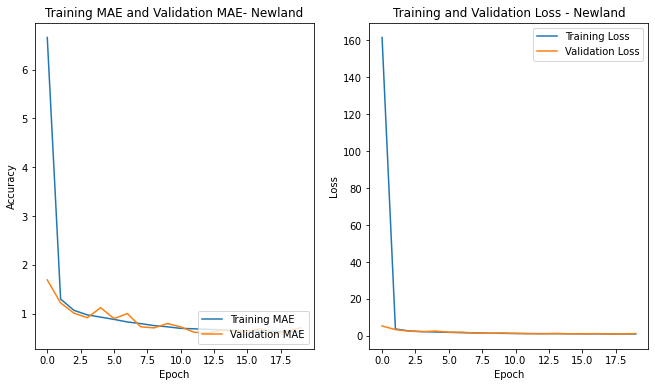

In [36]:
#plot of mae, val_mae and loss of the training and validation datasets
import matplotlib.pyplot as plt

epochs_range = range(20)
plt.figure(figsize=(11, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae1, label='Training MAE')
plt.plot(epochs_range, val_mae1, label='Validation MAE')
plt.legend(loc='lower right')
plt.title('Training MAE and Validation MAE- Newland')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Training Loss')
plt.plot(epochs_range, val_loss1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - Newland')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [37]:
#printing the mse, mae, rmse and r2 values from the neural network regression model on the test dataset

print(mse_neuraln1)
print(mae_neuraln1)
print(r2_neuraln1)
print(rmse_neuraln1)

1.1942107677459717
0.7038641571998596
0.7735490857418905
1.0927995094004992


# WORKING ON SALMON DATASET

In [38]:
salmon.head(2)

,Date & Time,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
0,2021-12-02 10:35:00,0.2,0.0,46.7,32.5,37.7,45.1,43.2,46.4,7.4,8.3,9.2,9.4,9.9,10.2,1.7,87.1
1,2021-12-02 10:40:00,0.0,0.0,46.7,32.6,37.8,45.1,43.2,46.4,7.4,8.3,9.3,9.4,9.9,10.2,1.7,86.3


In [39]:
#setting the "Date & Time" as index
salmon.set_index("Date & Time", inplace = True)

#### Applying the split_data function


First, we start by applying the "split_data" function on the dataset. The function separates the salmon dataset into features and target variables, splits the data into test and training datasets and normalize the data.

In [40]:
#Spliting the data into training and test datasets
x_train2, x_test2, y_train2, y_test2 = split_data (salmon)

# (A) MULTIPLE LINEAR REGRESSION

#### Applying the trad_modelling function for multiple linear regression

Here, we will be applying the "function" 2 called "trad_modelling" function for multiple linear regression. The function instantiates the model, predicts the y_pred and evaluate the model using some evaluation metrics.

In [41]:
mse_lr2, mae_lr2, rmse_lr2, r2_lr2, model_lr2 = trad_modelling (LinearRegression(), x_train2, x_test2, y_train2, y_test2)

In [42]:
#printing the mse, mae, rmse and r2 values from the multiple linear regression model on the test dataset

print(mse_lr2)
print(mae_lr2)
print(r2_lr2)
print(rmse_lr2)

9.897556576801817
2.2302845393072213
0.8074244752418315
3.146038235114414


# (B) RANDOM FOREST REGRESSION

#### Applying the trad_modelling function for random forest regression

Here, we will be applying the "function" 2 called "trad_modelling" function for random forest regression. The function instantiates the model, predicts the y_pred and evaluate the model using some evaluation metrics.

In [43]:
mse_rf2, mae_rf2, rmse_rf2, r2_rf2, model_rf2 = trad_modelling (RandomForestRegressor(), x_train2, x_test2, y_train2, y_test2)

In [44]:
#printing the mse, mae, rmse and r2 values from the random forest regression model on the test dataset

print(mse_rf2)
print(mae_rf2)
print(r2_rf2)
print(rmse_rf2)

0.06058042737604539
0.05770541202965515
0.9986504182877042
0.24613091511641805


# (C) DECISION TREE REGRESSION

#### 3. Applying the trad_modelling function for decision tree regression

Here, we will be applying the "function" 2 called "trad_modelling" function for decision tree regression. The function instantiates the model, predicts the y_pred and evaluate the model using some evaluation metrics.

In [45]:
mse_dt2, mae_dt2, rmse_dt2, r2_dt2, model_dt2 = trad_modelling (DecisionTreeRegressor(), x_train2, x_test2, y_train2, y_test2)

In [46]:
#printing the mse, mae, rmse and r2 values from the decision tree regression model on the test dataset

print(mse_dt2)
print(mae_dt2)
print(r2_dt2)
print(rmse_dt2)

0.11865822239339807
0.054541446663301484
0.9975951348358526
0.3444680281149443


# (D) DEEP NEURAL REGRESSION 

#### 4. Applying the deep_neural_regression function for deep neural regression

Here, we will be applying the "function 3" called "deep_neural_regression" function for deep neural regression. The function builds the model, predicts the y_pred using deep neural regression model and also evaluate the model using some evaluation metrics.

In [47]:
mse_neuraln2, mae_neuraln2, historyn2, r2_neuraln2, rmse_neuraln2, model_n2 = deep_neural_regression(x_train2, y_train2, x_test2, y_test2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1408      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 6)                 102       
                                                                 
Total params: 12,374
Trainable params: 12,374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1212/1212 [============================

### GRAPHICAL REPRESENTATION OF MAE, VAL_MAE, LOSS AND VAL_LOSS

Here we plot graph of mae of the training dataset and validation dataset by the epoch range

* MAE stands for the mean absolute error
* VAL_MAE stands for mean absolute error for validation

In [48]:
# list all data in history
print(historyn2.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [49]:
mae2= historyn2.history['mae']
val_mae2 = historyn2.history['val_mae']

loss2 = historyn2.history['loss']
val_loss2 = historyn2.history['val_loss']

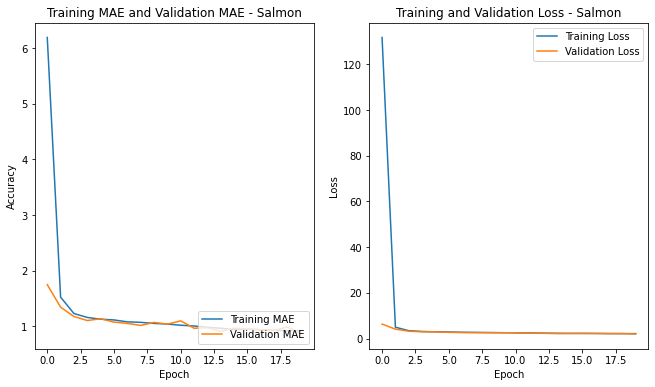

In [50]:
#plot of mae, val_mae and loss of the training and validation datasets
import matplotlib.pyplot as plt

epochs_range = range(20)
plt.figure(figsize=(11, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae2, label='Training MAE')
plt.plot(epochs_range, val_mae2, label='Validation MAE')
plt.legend(loc='lower right')
plt.title('Training MAE and Validation MAE - Salmon')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - Salmon')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [51]:
#printing the mse, mae, rmse and r2 values from the neural network regression model on the test dataset

print(mse_neuraln2)
print(mae_neuraln2)
print(r2_neuraln2)
print(rmse_neuraln2)

1.9940810203552246
0.8596022725105286
0.920216224065057
1.412119336442648


# WORKING ON WILBERFORCE DATASET

In [52]:
wilberforce001.head(2)

,Date & Time,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
0,2021-12-08 15:05:00,0.0,0.0,18.1,19.9,33.0,41.0,43.2,46.1,6.2,6.2,6.5,6.2,6.8,7.0,7.0,81.2
1,2021-12-08 15:10:00,0.0,0.0,18.2,20.0,33.1,41.2,43.3,46.2,6.1,6.2,6.5,6.3,7.0,7.0,6.9,81.2


In [53]:
#setting the "Date & Time" as index
wilberforce001.set_index("Date & Time", inplace = True)

####  Applying the split_data function

First, we start by applying the "split_data" function. The function separates the wilberforce001 dataset into features and target variables, splits the data into test and training datasets and normalize the data.

In [54]:
#Spliting the data into training and test datasets
x_train3, x_test3, y_train3, y_test3 = split_data (wilberforce001)

# (A) MULTIPLE LINEAR REGRESSION

#### Applying the trad_modelling function for multiple linear regression

Here, we will be applying the "function" 2 called "trad_modelling" function for multiple linear regression. The function instantiates the model, predicts the y_pred and evaluate the model using some evaluation metrics.

In [55]:
mse_lr3, mae_lr3, rmse_lr3, r2_lr3, model_lr3 = trad_modelling (LinearRegression(), x_train3, x_test3, y_train3, y_test3)

In [56]:
#printing the mse, mae, rmse and r2 values from the multiple linear regression model on the test dataset

print(mse_lr3)
print(mae_lr3)
print(r2_lr3)
print(rmse_lr3)

18.138205783840448
3.018725274997886
0.6612520675894783
4.258897249739708


# (B) RANDOM FOREST REGRESSION

#### Applying the trad_modelling function for random forest regression

Here, we will be applying the "function" 2 called "trad_modelling" function for random forest regression. The function instantiates the model, predicts the y_pred and also evaluate the model using some evaluation metrics.

In [57]:
mse_rf3, mae_rf3, rmse_rf3, r2_rf3, model_rf3 = trad_modelling (RandomForestRegressor(), x_train3, x_test3, y_train3, y_test3)

In [58]:
#printing the mse, mae, rmse and r2 values from the random forest regression model on the test dataset

print(mse_rf3)
print(mae_rf3)
print(r2_rf3)
print(rmse_rf3)

0.1741796431491801
0.08401582372144804
0.9987665818387533
0.41734834748586236


# (C) DECISION TREE REGRESSION

#### Applying the trad_modelling function for decision tree regression

Here, we will be applying the "function" 2 called "trad_modelling" function for decision tree regression. The function instantiates the model, predicts the y_pred using the traditional model and also evaluate the model using some evaluation metrics.

In [59]:
mse_dt3, mae_dt3, rmse_dt3, r2_dt3, model_dt3 = trad_modelling (DecisionTreeRegressor(), x_train3, x_test3, y_train3, y_test3)

In [60]:
#printing the mse, mae, rmse and r2 values from the decision tree regression model on the test dataset

print(mse_dt3)
print(mae_dt3)
print(r2_dt3)
print(rmse_dt3)

0.3704403157525817
0.0751425437801853
0.9975629675521716
0.6086380827327368


# (D) DEEP NEURAL REGRESSION 

#### Applying the deep_neural_regression function for deep neural regression

Here, we will be applying the "function 3" called "deep_neural_regression" function for deep neural regression. The function builds the model, predicts the y_pred using deep neural regression model and also evaluate the model using some evaluation metrics.

In [61]:
mse_neuraln3, mae_neuraln3, historyn3, r2_neuraln3, rmse_neuraln3, model_n3 = deep_neural_regression(x_train3, y_train3, x_test3, y_test3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1408      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 6)                 102       
                                                                 
Total params: 12,374
Trainable params: 12,374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1177/1177 [============================

### GRAPHICAL REPRESENTATION OF MAE, VAL_MAE, LOSS AND VAL_LOSS
Here we plot graph of mae of the training dataset and validation dataset by the epoch range

* MAE stands for the mean absolute error
* VAL_MAE stands for mean absolute error for validation

In [62]:
# list all data in history
print(historyn3.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [63]:
mae3 = historyn3.history['mae']
val_mae3 = historyn3.history['val_mae']

loss3 = historyn3.history['loss']
val_loss3 = historyn3.history['val_loss']

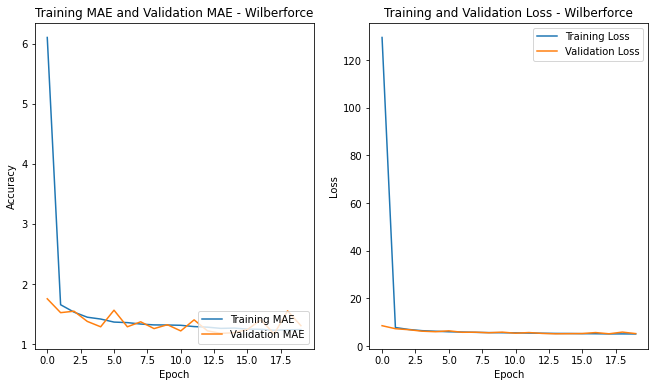

In [64]:
#plot of mae, val_mae and loss of the training and validation datasets
import matplotlib.pyplot as plt

epochs_range = range(20)
plt.figure(figsize=(11, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae3, label='Training MAE')
plt.plot(epochs_range, val_mae3, label='Validation MAE')
plt.legend(loc='lower right')
plt.title('Training MAE and Validation MAE - Wilberforce')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss3, label='Training Loss')
plt.plot(epochs_range, val_loss3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - Wilberforce')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [65]:
#printing the mse, mae, rmse and r2 values from the deep neural regression model on the test dataset

print(mse_neuraln3)
print(mae_neuraln3)
print(r2_neuraln3)
print(rmse_neuraln3)

4.936197757720947
1.290204644203186
0.8956061788070354
2.2217555575987533


## STATISTICAL ANALYSIS OF THE DATASETS

Here we use the describe method to check some statistical values such as mean, std, median etc of the datasets

### Newland - Statistical Summary

In [66]:
#checking the statistical description
new_stat = newland.describe().round(2)
new_stat

,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
count,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00,58288.00
mean,0.00,0.03,31.32,41.20,45.80,49.16,50.58,50.98,10.53,10.36,10.56,10.08,9.78,9.82,9.57,77.61
std,0.03,0.57,15.43,7.55,3.05,2.09,0.88,0.60,4.34,3.98,3.54,3.24,2.96,2.71,4.84,11.85
min,0.00,0.00,5.00,22.40,38.20,38.60,43.80,46.90,3.70,4.50,5.50,5.70,5.90,6.20,-1.40,33.30
25%,0.00,0.00,13.00,36.80,42.90,47.80,50.50,50.70,6.90,6.80,7.40,7.20,7.10,7.30,5.90,70.48
50%,0.00,0.00,40.70,45.30,46.60,49.50,50.80,51.00,9.70,9.30,9.50,9.00,8.70,8.80,9.00,79.70
75%,0.00,0.00,43.70,46.80,48.80,51.00,51.20,51.40,14.39,14.10,13.90,13.30,12.60,12.40,12.70,86.20
max,2.60,55.00,49.00,47.80,49.40,51.30,51.40,52.00,21.70,19.30,18.10,16.90,16.10,15.70,29.80,98.50


### Salmon - Statistical Summary

In [67]:
#checking the statistical description
sal_stat = salmon.describe().round(2)
sal_stat

,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
count,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00,60597.00
mean,0.00,0.03,36.10,31.35,36.22,43.51,42.55,46.58,9.52,9.43,9.83,9.63,9.77,9.90,9.38,77.98
std,0.04,0.57,17.64,11.47,10.24,5.65,2.34,0.56,3.63,3.32,3.04,2.80,2.67,2.43,4.85,11.82
min,0.00,0.00,1.70,3.00,7.10,24.00,34.50,44.30,3.90,4.70,5.70,5.90,6.40,6.80,-1.40,33.30
25%,0.00,0.00,18.50,26.10,36.40,44.80,42.50,46.40,6.66,6.70,7.20,7.20,7.40,7.80,5.70,70.90
50%,0.00,0.00,48.00,36.80,41.30,45.90,43.37,46.70,8.30,8.20,8.60,8.60,8.80,9.10,8.80,80.10
75%,0.00,0.00,49.30,39.40,42.30,46.40,43.70,47.00,12.80,12.50,12.40,11.90,11.90,11.80,12.50,86.60
max,2.00,40.00,52.30,50.40,49.90,49.90,46.60,47.10,18.90,17.30,16.70,16.00,15.90,15.60,29.80,98.50


### Wilberforce001 - Statistical Summary

In [68]:
#checking the statistical description
wil_stat = wilberforce001.describe()
round(wil_stat, 2)

,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
count,58815.00,58815.00,58815.00,58815.00,58815.00,58815.0,58815.00,58815.00,58815.00,58815.00,58815.00,58815.00,58815.00,58815.00,58815.00,58815.00
mean,0.00,0.03,22.89,37.26,41.66,45.8,47.39,48.91,8.95,8.78,8.65,8.04,8.24,7.96,9.53,77.69
std,0.04,0.62,16.10,15.23,11.32,8.0,4.56,1.08,3.70,3.36,3.07,2.89,2.68,2.48,4.83,11.84
min,0.00,0.00,1.50,9.10,16.40,19.7,26.90,44.30,3.30,3.80,4.30,4.00,4.60,4.70,-1.40,33.30
25%,0.00,0.00,3.30,21.10,33.90,48.3,48.60,48.80,5.80,5.90,6.10,5.50,5.80,5.80,5.80,70.60
50%,0.00,0.00,30.80,46.50,48.50,49.8,48.80,49.00,8.00,7.70,7.70,7.00,7.20,7.00,9.00,79.80
75%,0.00,0.00,34.80,48.00,49.10,50.0,48.90,49.20,12.40,12.00,11.40,10.60,10.60,10.00,12.70,86.30
max,2.60,57.20,56.10,52.90,50.80,51.2,50.20,50.30,17.40,15.90,15.10,14.20,14.00,13.40,29.80,98.50


## CHECKING FOR CORRELATION AMONG THE DATASET VARIABLES
Here we checked for correlation among the variables of the datasets.

### Correlation - Newland

In [69]:
#checking for correlation
corr_new = newland.corr()
round(corr_new, 2)

,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
Rain - mm,1.00,0.75,0.03,0.02,0.01,0.00,0.01,-0.00,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.04,0.10
Rain Rate - mm/h,0.75,1.00,0.00,-0.00,0.00,0.00,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.04
Soil Moisture 10 cm - %,0.03,0.00,1.00,0.91,0.69,0.41,0.39,-0.42,-0.87,-0.89,-0.91,-0.93,-0.94,-0.95,-0.69,0.33
Soil Moisture 20 cm - %,0.02,-0.00,0.91,1.00,0.84,0.56,0.61,-0.18,-0.78,-0.80,-0.83,-0.85,-0.87,-0.88,-0.67,0.29
Soil Moisture 30 cm - %,0.01,0.00,0.69,0.84,1.00,0.90,0.84,0.28,-0.44,-0.47,-0.50,-0.53,-0.56,-0.60,-0.43,0.05
Soil Moisture 40 cm - %,0.00,0.00,0.41,0.56,0.90,1.00,0.86,0.54,-0.12,-0.14,-0.18,-0.21,-0.24,-0.28,-0.17,-0.14
Soil Moisture 50 cm - %,0.01,0.01,0.39,0.61,0.84,0.86,1.00,0.61,-0.20,-0.22,-0.25,-0.27,-0.30,-0.33,-0.25,-0.01
Soil Moisture 60 cm - %,-0.00,0.01,-0.42,-0.18,0.28,0.54,0.61,1.00,0.50,0.50,0.49,0.47,0.45,0.42,0.34,-0.33
Soil Temperature 10 cm - °C,-0.03,-0.00,-0.87,-0.78,-0.44,-0.12,-0.20,0.50,1.00,0.99,0.98,0.96,0.95,0.94,0.81,-0.45
Soil Temperature 20 cm - °C,-0.03,-0.00,-0.89,-0.80,-0.47,-0.14,-0.22,0.50,0.99,1.00,1.00,0.99,0.98,0.97,0.76,-0.41


#### Correlation - Salmon

In [70]:
#checking for correlation
corr_sal = salmon.corr().round(2)
corr_sal

,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
Rain - mm,1.00,0.76,0.02,0.02,0.02,0.03,0.03,0.02,-0.03,-0.03,-0.02,-0.02,-0.02,-0.02,-0.05,0.11
Rain Rate - mm/h,0.76,1.00,0.01,0.00,0.01,0.01,0.01,0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.02,0.05
Soil Moisture 10 cm - %,0.02,0.01,1.00,0.94,0.89,0.81,0.82,0.59,-0.92,-0.94,-0.95,-0.95,-0.96,-0.95,-0.72,0.39
Soil Moisture 20 cm - %,0.02,0.00,0.94,1.00,0.97,0.92,0.92,0.79,-0.83,-0.87,-0.89,-0.90,-0.91,-0.92,-0.66,0.32
Soil Moisture 30 cm - %,0.02,0.01,0.89,0.97,1.00,0.97,0.96,0.84,-0.84,-0.87,-0.89,-0.90,-0.91,-0.92,-0.68,0.35
Soil Moisture 40 cm - %,0.03,0.01,0.81,0.92,0.97,1.00,0.98,0.92,-0.77,-0.80,-0.83,-0.84,-0.85,-0.86,-0.63,0.33
Soil Moisture 50 cm - %,0.03,0.01,0.82,0.92,0.96,0.98,1.00,0.90,-0.78,-0.80,-0.83,-0.84,-0.84,-0.85,-0.64,0.32
Soil Moisture 60 cm - %,0.02,0.01,0.59,0.79,0.84,0.92,0.90,1.00,-0.54,-0.57,-0.61,-0.63,-0.65,-0.67,-0.44,0.16
Soil Temperature 10 cm - °C,-0.03,-0.01,-0.92,-0.83,-0.84,-0.77,-0.78,-0.54,1.00,0.99,0.98,0.96,0.95,0.94,0.83,-0.43
Soil Temperature 20 cm - °C,-0.03,-0.01,-0.94,-0.87,-0.87,-0.80,-0.80,-0.57,0.99,1.00,1.00,0.99,0.98,0.97,0.77,-0.40


#### Correlation - Wilberforce001

In [71]:
#checking for correlation
corr_wil = wilberforce001.corr()
corr_wil.round(2)

,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %
Rain - mm,1.00,0.75,0.07,0.03,0.02,0.02,0.02,0.01,-0.03,-0.03,-0.03,-0.02,-0.02,-0.02,-0.04,0.10
Rain Rate - mm/h,0.75,1.00,0.03,0.01,-0.00,0.01,0.01,0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.04
Soil Moisture 10 cm - %,0.07,0.03,1.00,0.93,0.81,0.65,0.40,0.02,-0.89,-0.90,-0.90,-0.90,-0.90,-0.90,-0.67,0.37
Soil Moisture 20 cm - %,0.03,0.01,0.93,1.00,0.96,0.82,0.53,0.12,-0.90,-0.92,-0.92,-0.93,-0.94,-0.94,-0.70,0.38
Soil Moisture 30 cm - %,0.02,-0.00,0.81,0.96,1.00,0.92,0.63,0.21,-0.87,-0.89,-0.90,-0.91,-0.92,-0.93,-0.69,0.36
Soil Moisture 40 cm - %,0.02,0.01,0.65,0.82,0.92,1.00,0.84,0.46,-0.77,-0.79,-0.81,-0.82,-0.83,-0.84,-0.63,0.34
Soil Moisture 50 cm - %,0.02,0.01,0.40,0.53,0.63,0.84,1.00,0.85,-0.54,-0.56,-0.57,-0.58,-0.59,-0.60,-0.47,0.26
Soil Moisture 60 cm - %,0.01,0.01,0.02,0.12,0.21,0.46,0.85,1.00,-0.14,-0.15,-0.16,-0.17,-0.17,-0.18,-0.17,0.09
Soil Temperature 10 cm - °C,-0.03,-0.01,-0.89,-0.90,-0.87,-0.77,-0.54,-0.14,1.00,0.99,0.98,0.97,0.96,0.95,0.81,-0.43
Soil Temperature 20 cm - °C,-0.03,-0.01,-0.90,-0.92,-0.89,-0.79,-0.56,-0.15,0.99,1.00,1.00,0.99,0.99,0.98,0.76,-0.40


## DATA MANIPULATION

Here we carried out data manipulation to extract month from the datetime column and map out the respective month name

### Data manipulation on Newland dataset

In [72]:
import matplotlib.pyplot as plt

In [73]:
#resetting the index for newland dataset
newland.reset_index("Date & Time", inplace = True)

In [74]:
#breaking the date-time column into month
newland["Month"] = newland["Date & Time"].dt.month

#mapping the values representing month to their month names
month_map = {1 :'Jan', 2 : 'Feb', 3 :'Mar', 4 :'Apr', 5:'May', 6 :'Jun', 7:'Jul',8 :'Aug', 9:'Sep', 10 :'Oct', 11:'Nov', 12:'Dec'}
newland["Name_month"] = newland["Month"].map (month_map)
newland["Name_month"].unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'],
      dtype=object)

## Data manipulation on Salmon

In [75]:
#resetting the index for salmon dataset
salmon.reset_index("Date & Time", inplace = True)

In [76]:
#breaking the date-time column into month
salmon["Month"] = salmon["Date & Time"].dt.month

#mapping the values representing month to their month names
month_map = {1 :'Jan', 2 : 'Feb', 3 :'Mar', 4 :'Apr', 5:'May', 6 :'Jun', 7:'Jul',8 :'Aug', 9:'Sep', 10 :'Oct', 11:'Nov', 12:'Dec'}
salmon["Name_month"] = salmon["Month"].map (month_map)
salmon["Name_month"].unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'],
      dtype=object)

### Data manipulation on wilberforce001 dataset

In [77]:
#resetting the index for wilberforce001 dataset
wilberforce001.reset_index("Date & Time", inplace = True)

In [78]:
#breaking the date-time column into month
wilberforce001["Month"] = wilberforce001["Date & Time"].dt.month

#mapping the values representing month to their month names
month_map = {1 :'Jan', 2 : 'Feb', 3 :'Mar', 4 :'Apr', 5:'May', 6 :'Jun', 7:'Jul',8 :'Aug', 9:'Sep', 10 :'Oct', 11:'Nov', 12:'Dec'}
wilberforce001["Name_month"] = wilberforce001["Month"].map (month_map)
wilberforce001["Name_month"].unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'],
      dtype=object)

# DATA VISUALISATION

## Regplot to visualize linear relationship among the variables of Newland dataset

In [79]:
#setting date & time as index
newland.set_index("Date & Time", inplace = True)

#resampling newland dataset into weekly
new_resample_newland = newland.resample("W").mean()

<AxesSubplot:xlabel='Soil Temperature 30 cm - °C', ylabel='Soil Moisture 30 cm - %'>

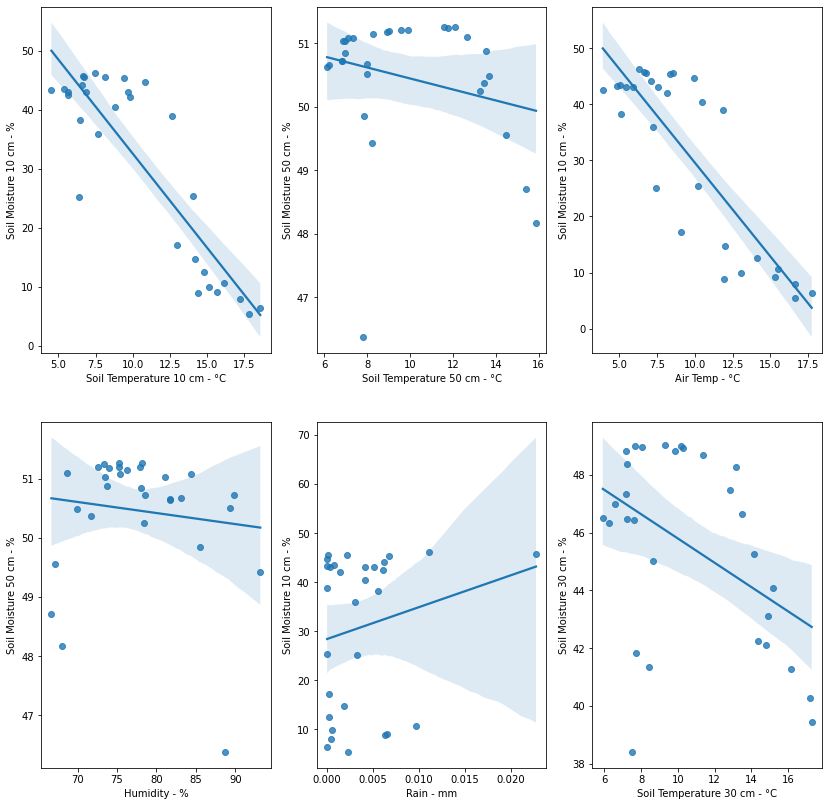

In [129]:
#regplot of newland dataset after resampling into weekly datapoints
fig = plt.figure(figsize=(14, 14)) 

ax1 = fig.add_subplot(231)
ax2 =fig.add_subplot(232)
ax3 =fig.add_subplot(233)
ax4 =fig.add_subplot(234)
ax5 =fig.add_subplot(235)
ax6 =fig.add_subplot(236)


sns.regplot(x= "Soil Temperature 10 cm - °C", y = "Soil Moisture 10 cm - %", data = new_resample_newland, ax=ax1)
sns.regplot(x= "Soil Temperature 50 cm - °C", y = "Soil Moisture 50 cm - %", data = new_resample_newland, ax=ax2)
sns.regplot(x= "Air Temp - °C", y = "Soil Moisture 10 cm - %", data = new_resample_newland, ax=ax3)
sns.regplot(x= "Humidity - %", y = "Soil Moisture 50 cm - %", data = new_resample_newland, ax=ax4)
sns.regplot(x= "Rain - mm", y = "Soil Moisture 10 cm - %", data = new_resample_newland, ax=ax5)
sns.regplot(x= "Soil Temperature 30 cm - °C", y = "Soil Moisture 30 cm - %", data = new_resample_newland, ax=ax6)

## Visualizing soil moisture and soil temperature at different depths, with the air temperature, humidity and rainfall using a line plot

### NEWLAND - LINE PLOT OF SOIL MOISTURE, SOIL TEMPERATURE, HUMIDITY, RAINFALL, AIR TEMPERATURE

In [81]:
#resetting the index for newland dataset
newland.reset_index("Date & Time", inplace = True)

<AxesSubplot:xlabel='Date & Time'>

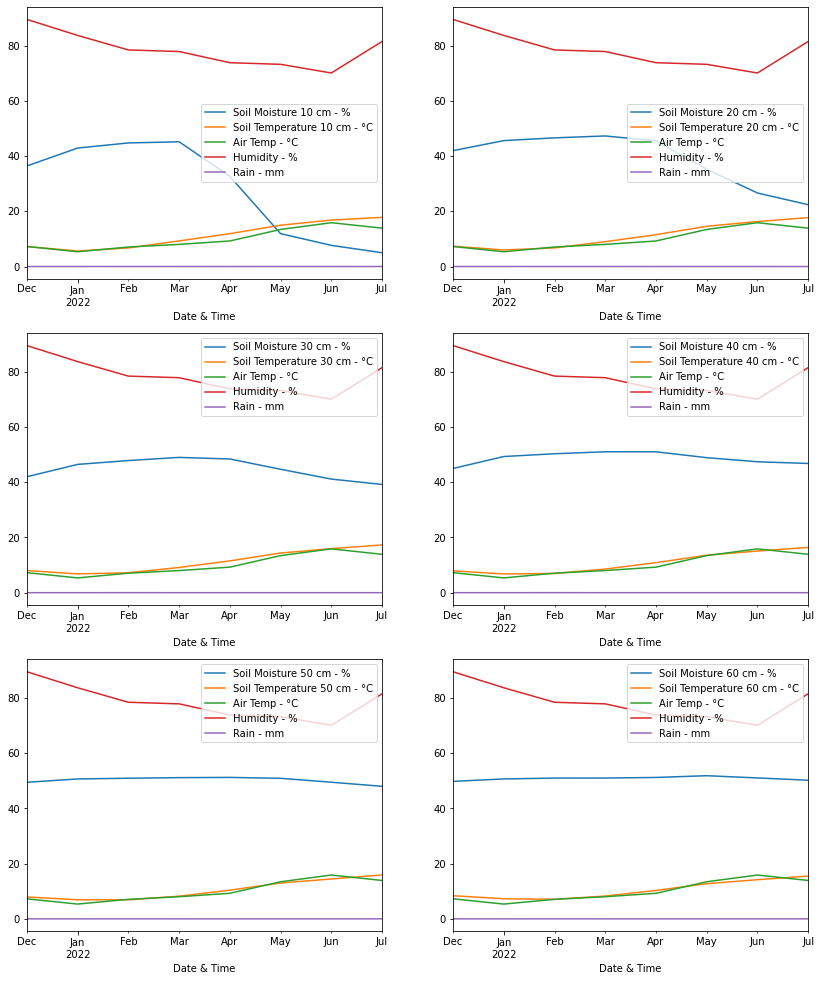

In [82]:
#line plot of soil temperature, air temperature, humidity, rainfall and soil moisture for newland dataset. 
#We created six different plots for the different soil moisture depths (10cm, 20cm, 30cm, 40cm, 50cm, 60cm) grouped at a monthly frequency

fig = plt.figure() 

ax1 = fig.add_subplot(321)
ax2 =fig.add_subplot(322)
ax3 =fig.add_subplot(323)
ax4 =fig.add_subplot(324)
ax5 =fig.add_subplot(325)
ax6 =fig.add_subplot(326)


newland[["Soil Moisture 10 cm - %", "Soil Temperature 10 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(14, 17))
newland[["Soil Moisture 20 cm - %", "Soil Temperature 20 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax2, figsize=(14, 17))
newland[["Soil Moisture 30 cm - %", "Soil Temperature 30 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax3, figsize=(14, 17))
newland[["Soil Moisture 40 cm - %", "Soil Temperature 40 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax4, figsize=(14, 17))
newland[["Soil Moisture 50 cm - %", "Soil Temperature 50 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax5, figsize=(14, 17))
newland[["Soil Moisture 60 cm - %", "Soil Temperature 60 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax6, figsize=(14, 17))

### SALMON - LINE PLOT OF SOIL MOISTURE, SOIL TEMPERATURE, HUMIDITY, RAINFALL, AIR TEMPERATURE

<AxesSubplot:xlabel='Date & Time'>

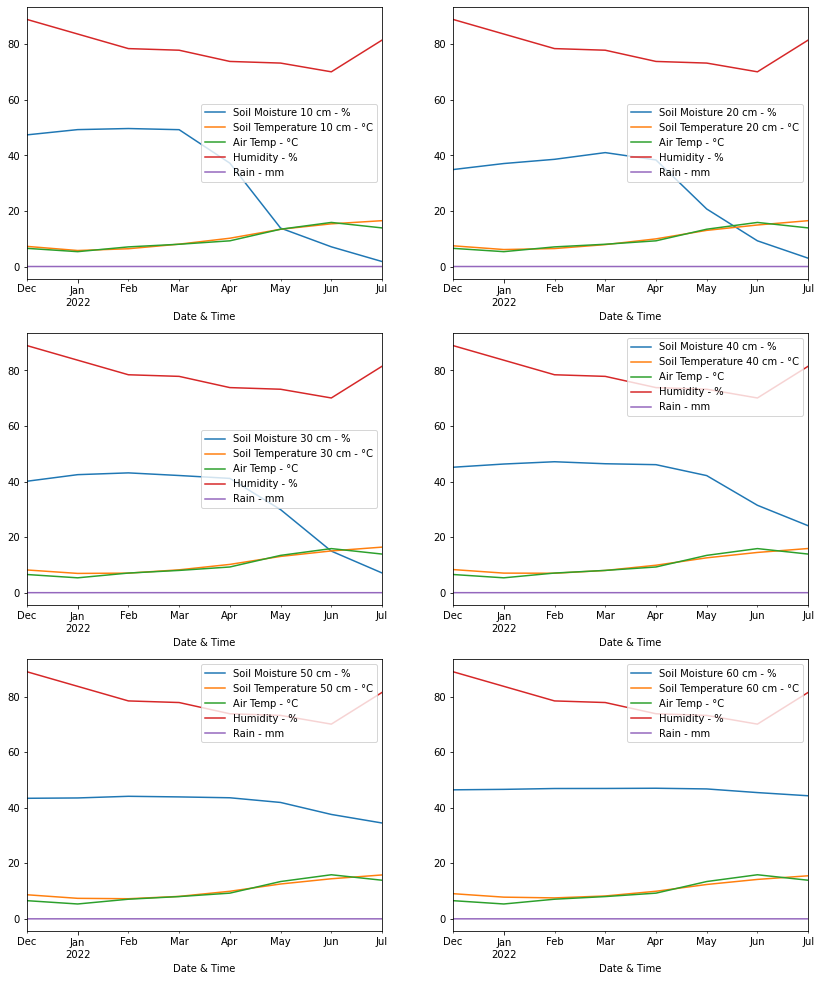

In [83]:
#line plot of soil temperature, air temperature, humidity, rainfall and soil moisture for salmon dataset. 
#We created six different plots for the different soil moisture depths (10cm, 20cm, 30cm, 40cm, 50cm, 60cm) grouped a monthly frequency

fig = plt.figure() 

ax1 = fig.add_subplot(321)
ax2 =fig.add_subplot(322)
ax3 =fig.add_subplot(323)
ax4 =fig.add_subplot(324)
ax5 =fig.add_subplot(325)
ax6 =fig.add_subplot(326)


salmon[["Soil Moisture 10 cm - %", "Soil Temperature 10 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(14, 17))
salmon[["Soil Moisture 20 cm - %", "Soil Temperature 20 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax2, figsize=(14, 17))
salmon[["Soil Moisture 30 cm - %", "Soil Temperature 30 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax3, figsize=(14, 17))
salmon[["Soil Moisture 40 cm - %", "Soil Temperature 40 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax4, figsize=(14, 17))
salmon[["Soil Moisture 50 cm - %", "Soil Temperature 50 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax5, figsize=(14, 17))
salmon[["Soil Moisture 60 cm - %", "Soil Temperature 60 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax6, figsize=(14, 17))

### WILBERFORCE - LINE PLOT OF SOIL MOISTURE, SOIL TEMPERATURE, HUMIDITY, RAINFALL, AIR TEMPERATURE

<AxesSubplot:xlabel='Date & Time'>

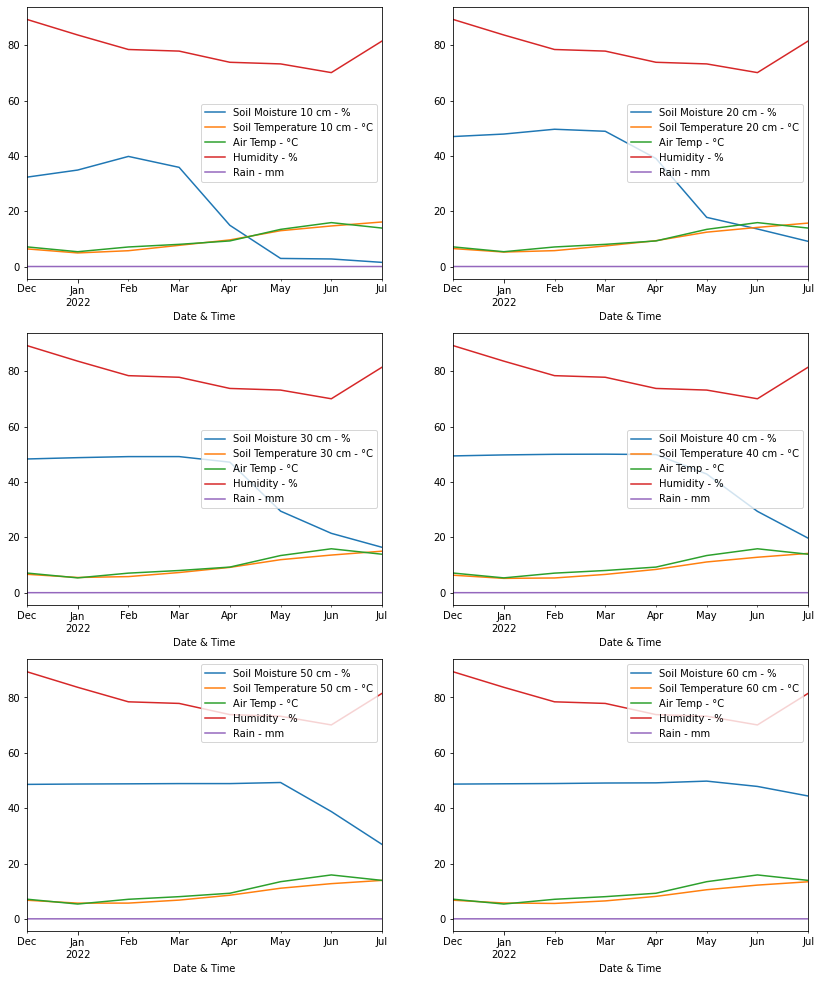

In [84]:
#line plot of soil temperature, air temperature, humidity, rainfall and soil moisture for wilberforce dataset. 
#We created six different plots for the different soil moisture depths (10cm, 20cm, 30cm, 40cm, 50cm, 60cm) grouped a monthly frequency

fig = plt.figure() 

ax1 = fig.add_subplot(321)
ax2 =fig.add_subplot(322)
ax3 =fig.add_subplot(323)
ax4 =fig.add_subplot(324)
ax5 =fig.add_subplot(325)
ax6 =fig.add_subplot(326)


wilberforce001[["Soil Moisture 10 cm - %", "Soil Temperature 10 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(14, 17))
wilberforce001[["Soil Moisture 20 cm - %", "Soil Temperature 20 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax2, figsize=(14, 17))
wilberforce001[["Soil Moisture 30 cm - %", "Soil Temperature 30 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax3, figsize=(14, 17))
wilberforce001[["Soil Moisture 40 cm - %", "Soil Temperature 40 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax4, figsize=(14, 17))
wilberforce001[["Soil Moisture 50 cm - %", "Soil Temperature 50 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax5, figsize=(14, 17))
wilberforce001[["Soil Moisture 60 cm - %", "Soil Temperature 60 cm - °C", "Air Temp - °C", "Humidity - %", 'Date & Time', "Rain - mm"]].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax6, figsize=(14, 17))

## BOXPLOT TO VISUALIZE SOIL MOISTURE PER MONTH

### Newland - Boxplot

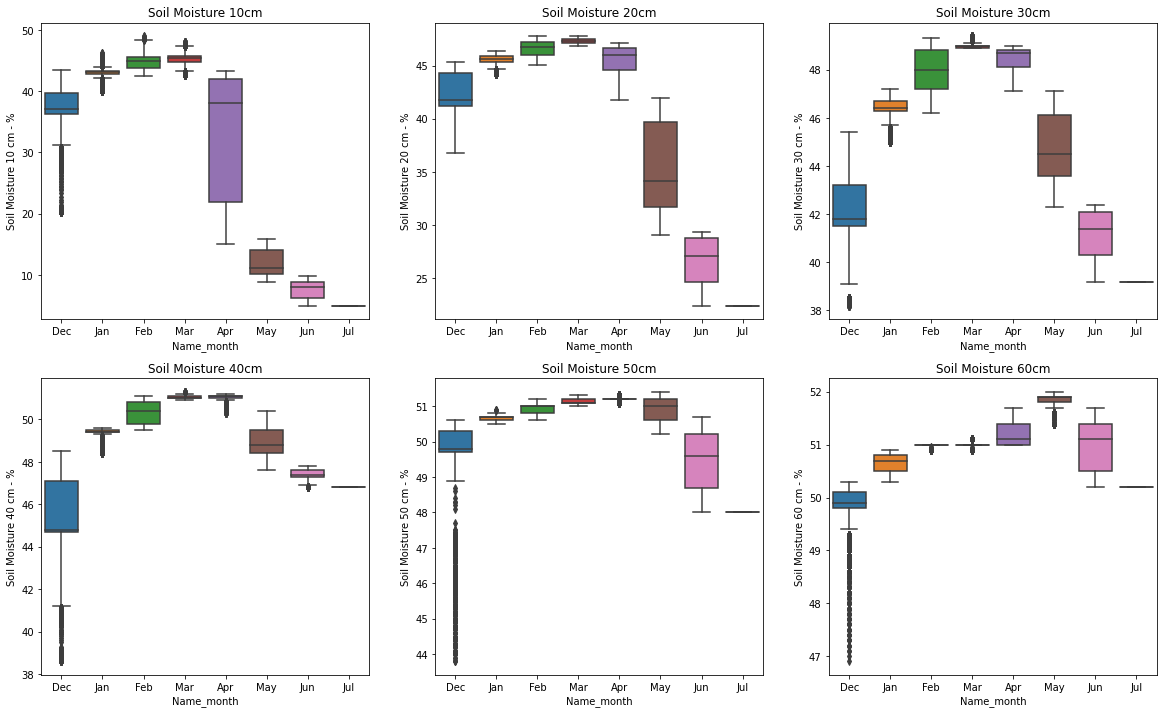

In [85]:
#we created boxplot of soil moisture per month (mean soil moisture for the month) for Newland dataset.
#Each of the plot showed the average soil moisture for the various depth being investigated (10cm, 20cm, 30cm, 40cm, 50cm, 60cm)


fig = plt.figure(figsize=(20, 12)) 

ax1 = fig.add_subplot(231)
ax2 =fig.add_subplot(232)
ax3 =fig.add_subplot(233)
ax4 =fig.add_subplot(234)
ax5 =fig.add_subplot(235)
ax6 =fig.add_subplot(236)

ax1.title.set_text('Soil Moisture 10cm')
ax2.title.set_text('Soil Moisture 20cm')
ax3.title.set_text('Soil Moisture 30cm')
ax4.title.set_text('Soil Moisture 40cm')
ax5.title.set_text('Soil Moisture 50cm')
ax6.title.set_text('Soil Moisture 60cm')


sns.boxplot(x = 'Name_month', y = 'Soil Moisture 10 cm - %', data = newland, ax=ax1)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 20 cm - %', data = newland, ax=ax2)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 30 cm - %', data = newland, ax=ax3)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 40 cm - %', data = newland, ax=ax4)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 50 cm - %', data = newland, ax=ax5)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 60 cm - %', data = newland, ax=ax6)
plt.show()

### Salmon - Boxplot

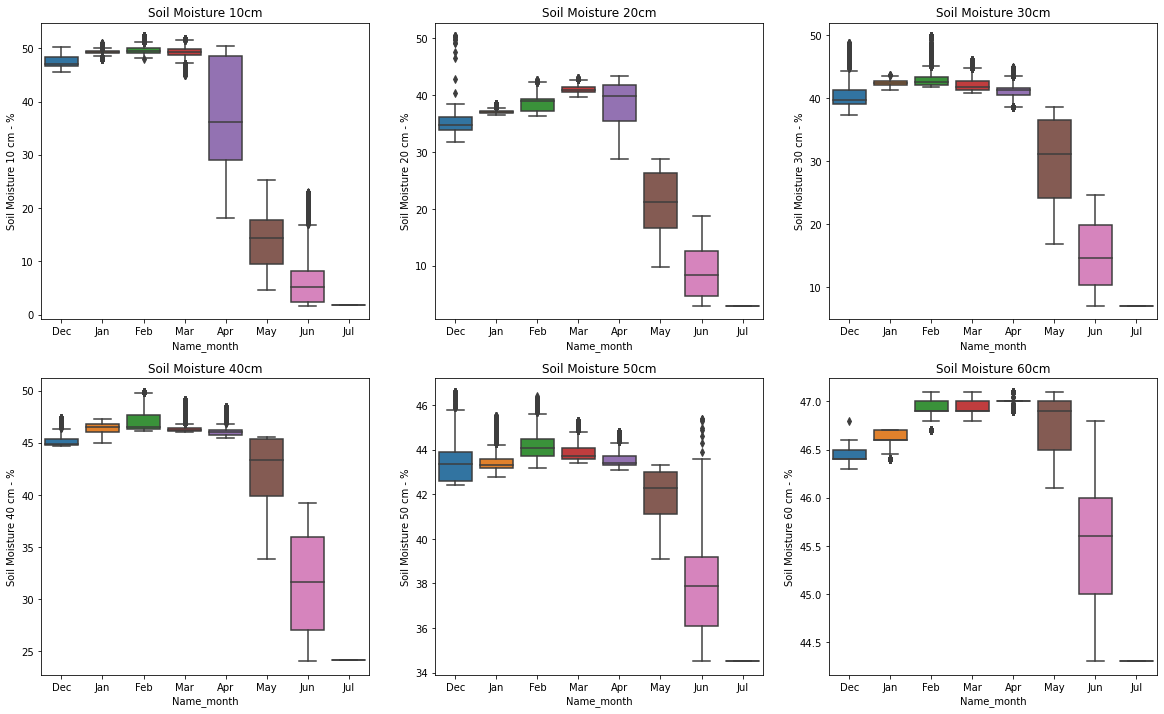

In [86]:
#we created boxplot of soil moisture per month (mean soil moisture for the month) for Salmon dataset.
#Each of the plot showed the average soil moisture for the various depth being investigated (10cm, 20cm, 30cm, 40cm, 50cm, 60cm)

fig = plt.figure(figsize=(20, 12)) 

ax1 = fig.add_subplot(231)
ax2 =fig.add_subplot(232)
ax3 =fig.add_subplot(233)
ax4 =fig.add_subplot(234)
ax5 =fig.add_subplot(235)
ax6 =fig.add_subplot(236)

ax1.title.set_text('Soil Moisture 10cm')
ax2.title.set_text('Soil Moisture 20cm')
ax3.title.set_text('Soil Moisture 30cm')
ax4.title.set_text('Soil Moisture 40cm')
ax5.title.set_text('Soil Moisture 50cm')
ax6.title.set_text('Soil Moisture 60cm')

sns.boxplot(x = 'Name_month', y = 'Soil Moisture 10 cm - %', data = salmon, ax=ax1)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 20 cm - %', data = salmon, ax=ax2)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 30 cm - %', data = salmon, ax=ax3)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 40 cm - %', data = salmon, ax=ax4)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 50 cm - %', data = salmon, ax=ax5)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 60 cm - %', data = salmon, ax=ax6)
plt.show()

### Boxplot - Wilberforce

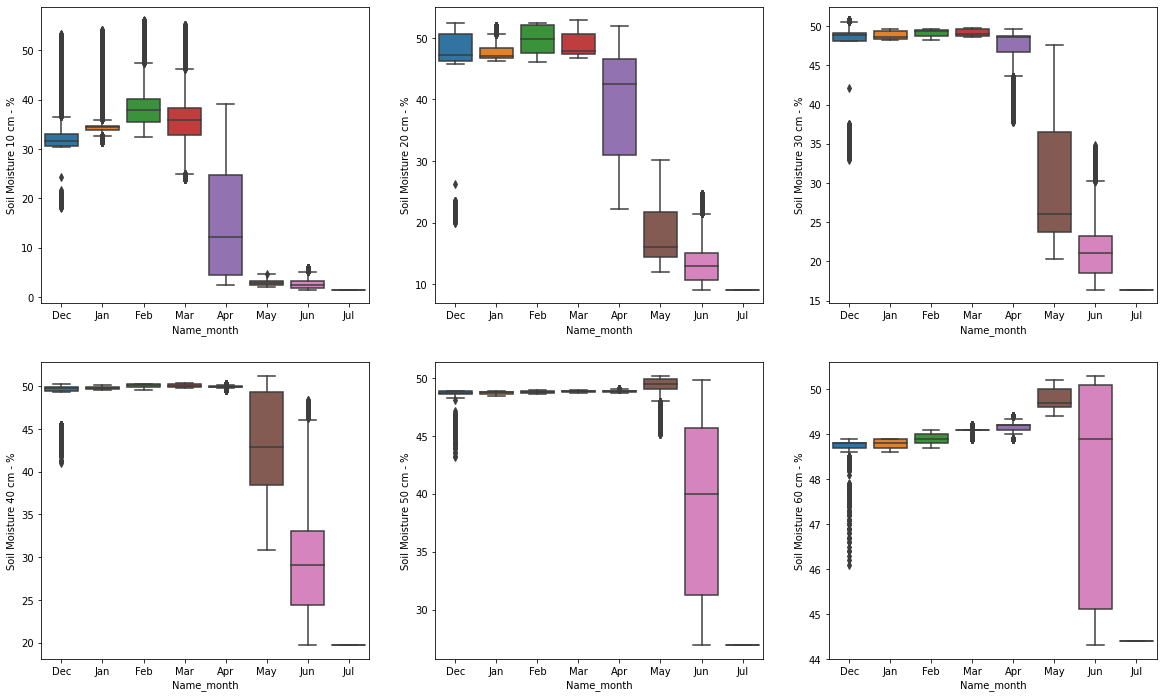

In [87]:
#we created boxplot of soil moisture per month (mean soil moisture for the month) for Wilberforce dataset.
#Each of the plot showed the average soil moisture for the various depth being investigated (10cm, 20cm, 30cm, 40cm, 50cm, 60cm)

fig = plt.figure(figsize=(20, 12)) 

ax1 = fig.add_subplot(231)
ax2 =fig.add_subplot(232)
ax3 =fig.add_subplot(233)
ax4 =fig.add_subplot(234)
ax5 =fig.add_subplot(235)
ax6 =fig.add_subplot(236)

sns.boxplot(x = 'Name_month', y = 'Soil Moisture 10 cm - %', data = wilberforce001, ax=ax1)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 20 cm - %', data = wilberforce001, ax=ax2)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 30 cm - %', data = wilberforce001, ax=ax3)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 40 cm - %', data = wilberforce001, ax=ax4)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 50 cm - %', data = wilberforce001, ax=ax5)
sns.boxplot(x = 'Name_month', y = 'Soil Moisture 60 cm - %', data = wilberforce001, ax=ax6)
plt.show()

### PLOTTING BOXPLOT AND HISTOGRAM ALONG THE SAME SCALE
Here we created combined boxplot and histogram to visualize the distribution of soil moisture datapoints for all six depths using the combined boxplot and histogram. The area between the beginning and end of each box (borders) indicates the area between the first (25%) and third (75%) quantiles. The green line represents the mean value. The solid vertical line inside each box represents the median value (interquartile range). The thin line shows the whole range of the SMC values, the entire standard deviation of the mean is the highlighted area. The histogram indicates the count of the SMC values while the dots show the outliers. 

In [88]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram 

### NEWLAND - HISTOGRAM BOXPLOT

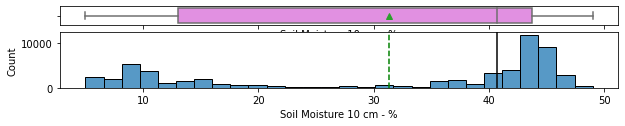

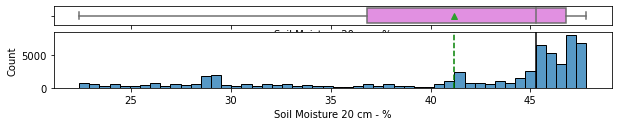

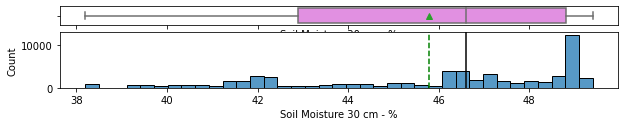

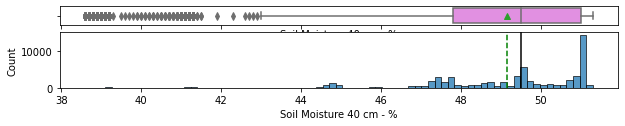

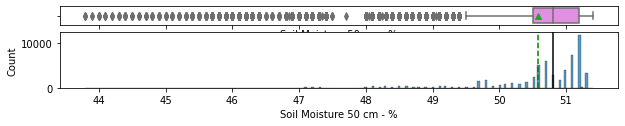

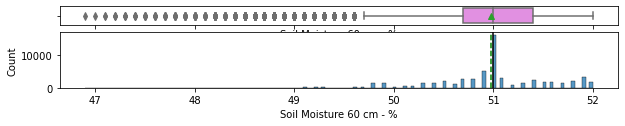

In [89]:
histogram_boxplot(newland, 'Soil Moisture 10 cm - %', figsize=(10, 1.5), kde=False, bins=None)
histogram_boxplot(newland, 'Soil Moisture 20 cm - %', figsize=(10, 1.5), kde=False, bins=None)
histogram_boxplot(newland, 'Soil Moisture 30 cm - %', figsize=(10, 1.5), kde=False, bins=None)
histogram_boxplot(newland, 'Soil Moisture 40 cm - %', figsize=(10, 1.5), kde=False, bins=None)
histogram_boxplot(newland, 'Soil Moisture 50 cm - %', figsize=(10, 1.5), kde=False, bins=None)
histogram_boxplot(newland, 'Soil Moisture 60 cm - %', figsize=(10, 1.5), kde=False, bins=None)

### SALMON - HISTOGRAM BOXPLOT

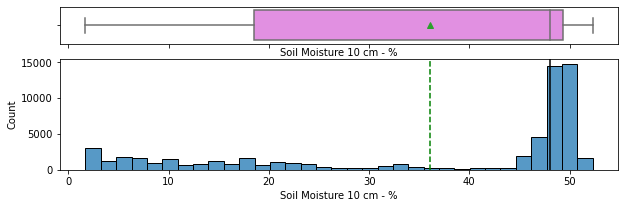

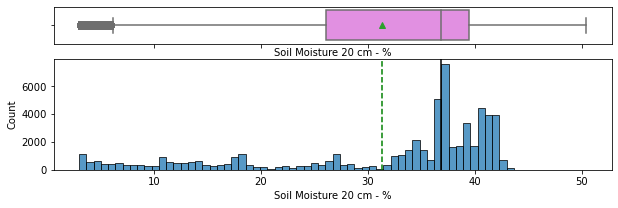

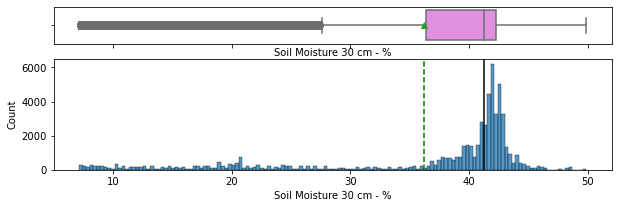

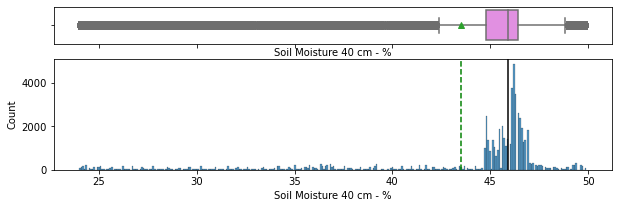

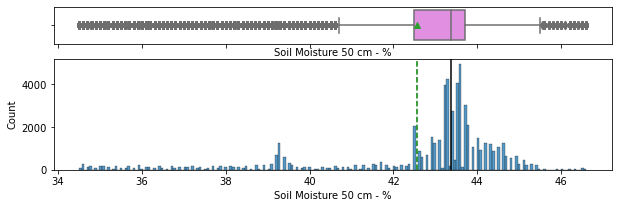

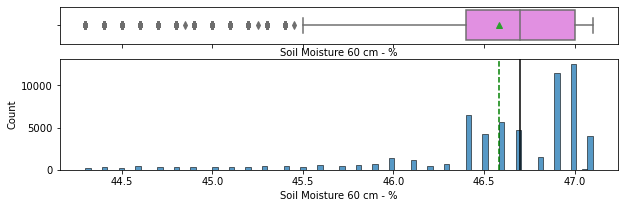

In [90]:
histogram_boxplot(salmon, 'Soil Moisture 10 cm - %', figsize=(10, 3), kde=False, bins=None)
histogram_boxplot(salmon, 'Soil Moisture 20 cm - %', figsize=(10, 3), kde=False, bins=None)
histogram_boxplot(salmon, 'Soil Moisture 30 cm - %', figsize=(10, 3), kde=False, bins=None)
histogram_boxplot(salmon, 'Soil Moisture 40 cm - %', figsize=(10, 3), kde=False, bins=None)
histogram_boxplot(salmon, 'Soil Moisture 50 cm - %', figsize=(10, 3), kde=False, bins=None)
histogram_boxplot(salmon, 'Soil Moisture 60 cm - %', figsize=(10, 3), kde=False, bins=None)

### WILBERFORCE001 - HISTOGRAM BOXPLOT

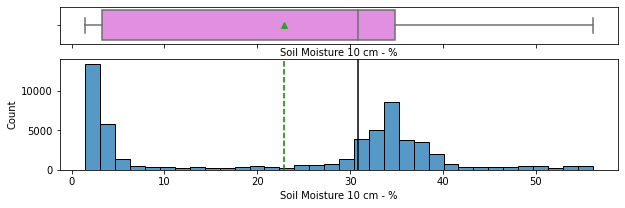

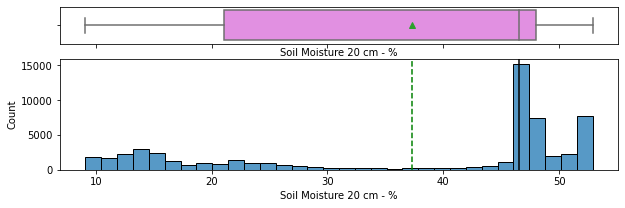

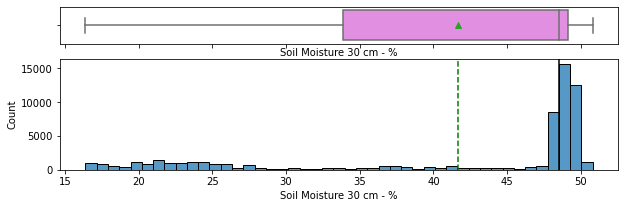

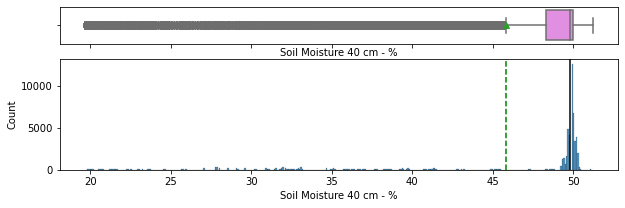

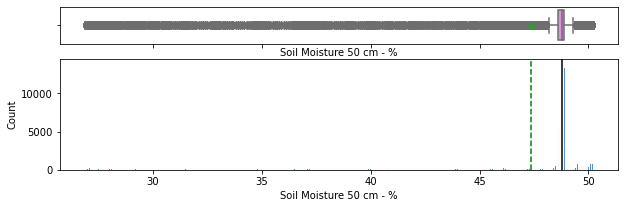

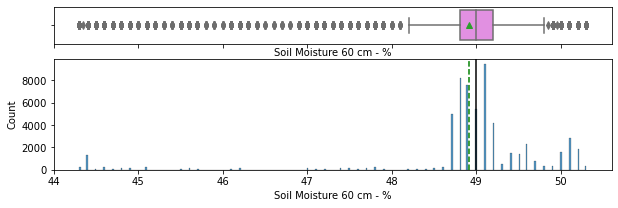

In [91]:
histogram_boxplot(wilberforce001, 'Soil Moisture 10 cm - %', figsize=(10, 3), kde=False, bins=None)
histogram_boxplot(wilberforce001, 'Soil Moisture 20 cm - %', figsize=(10, 3), kde=False, bins=None)
histogram_boxplot(wilberforce001, 'Soil Moisture 30 cm - %', figsize=(10, 3), kde=False, bins=None)
histogram_boxplot(wilberforce001, 'Soil Moisture 40 cm - %', figsize=(10, 3), kde=False, bins=None)
histogram_boxplot(wilberforce001, 'Soil Moisture 50 cm - %', figsize=(10, 3), kde=False, bins=None)
histogram_boxplot(wilberforce001, 'Soil Moisture 60 cm - %', figsize=(10, 3), kde=False, bins=None)

### Wilberforce Station - Plot of air temperature, soil temperature and soil moisture at 10cm, 30cm and 60cm grouped at a monthly frequency (Single plot)

<AxesSubplot:xlabel='Date & Time'>

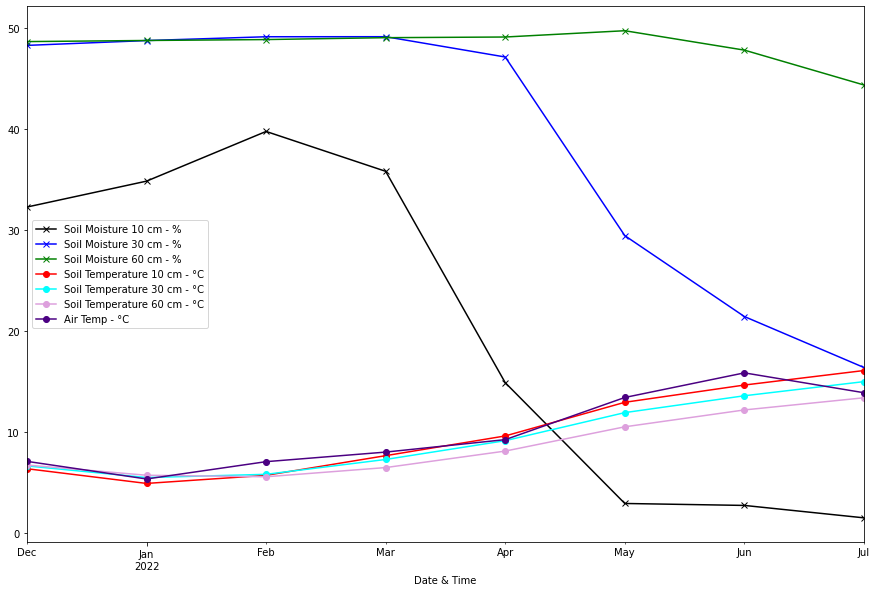

In [92]:
#month
fig = plt.figure() 

ax1 = fig.add_subplot(611)

wilberforce001[["Soil Moisture 10 cm - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 69), color='black', marker='x')
wilberforce001[["Soil Moisture 30 cm - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 69), color='blue', marker='x')
wilberforce001[["Soil Moisture 60 cm - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 69), color='green', marker='x')
wilberforce001[["Soil Temperature 10 cm - °C", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 69), color='red', marker='o')
wilberforce001[["Soil Temperature 30 cm - °C", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 69), color='cyan', marker='o')
wilberforce001[["Soil Temperature 60 cm - °C", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 69), color='plum', marker='o')
wilberforce001[["Air Temp - °C", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 69), color='indigo', marker='o')

### Wilberforce Station - Plot of humidity, soil moisture at 10cm, 30cm & 60cm and total rainfall, grouped at a monthly frequency (Single plot)

<AxesSubplot:xlabel='Date & Time'>

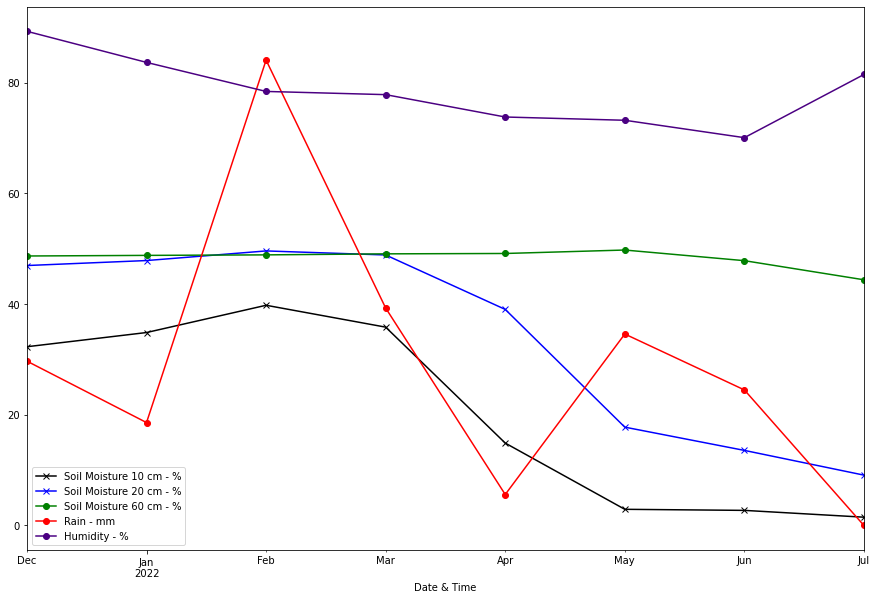

In [93]:
#month
fig = plt.figure() 

ax1 = fig.add_subplot(211)


wilberforce001[["Soil Moisture 10 cm - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 22), color='black', marker='x')
wilberforce001[["Soil Moisture 20 cm - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 22), color='blue', marker='x')
wilberforce001[["Soil Moisture 60 cm - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 22), color='green', marker='o')
wilberforce001[["Rain - mm", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).sum().plot(ax=ax1, figsize=(15, 22), color='red', marker='o')
wilberforce001[["Humidity - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='M')).mean().plot(ax=ax1, figsize=(15, 22), color='indigo', marker='o')


## MODEL PERFORMANCE ON THE VARIOUS DATASETS
The models performances evaluated using statistical metrics were displayed here with dataframe. The evaluation metrics used to evaluate the model included MSE, MAE, R2 and RMSE 

### NEWLAND - Models evaluation

In [94]:
data_new = {'Model': ['Multi_linear',"Random Forest", "Decision Tree", "Deep Neural"],
        "MSE": [mse_lr1, mse_rf1, mse_dt1, mse_neuraln1],
        "MAE": [mae_lr1, mae_rf1, mae_dt1, mae_neuraln1],
        "R2": [r2_lr1, r2_rf1, r2_dt1, r2_neuraln1],
        "RMSE": [rmse_lr1, rmse_rf1, rmse_dt1, rmse_neuraln1]}

newland_dff = pd.DataFrame(data = data_new)

# display the table of performance comparison
newland_dff.round(2)

,Model,MSE,MAE,R2,RMSE
0,Multi_linear,5.27,1.45,0.65,2.30
1,Random Forest,0.02,0.03,1.00,0.12
2,Decision Tree,0.03,0.03,1.00,0.18
3,Deep Neural,1.19,0.70,0.77,1.09


### Newland - Visualizing the models perfomance for MSE, MAE and RMSE

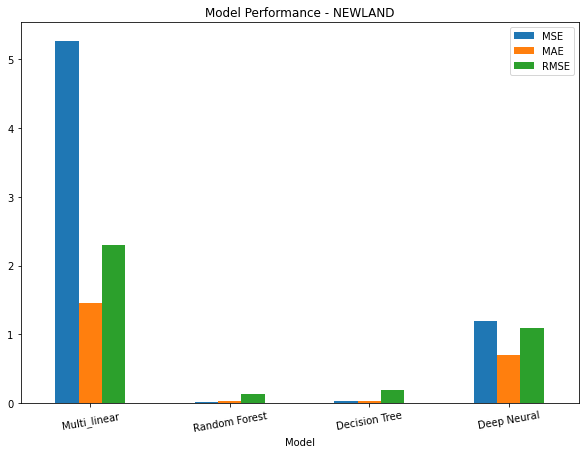

In [95]:
# Bar chart for Newland models performance
import matplotlib.pyplot as plt
(newland_dff.loc[ : , newland_dff.columns != 'R2']).plot.bar(x="Model", rot=10, title="Model Performance - NEWLAND", figsize=(10, 7));

plt.show(block=True)

### SALMON - Models evaluation

In [96]:
data_sal = {'Model': ['Multi_linear',"Random Forest", "Decision Tree", "Deep Neural"],
        "MSE": [mse_lr2, mse_rf2, mse_dt2, mse_neuraln2],
        "MAE": [mae_lr2, mae_rf2, mae_dt2, mae_neuraln2],
        "R2": [r2_lr2, r2_rf2, r2_dt2, r2_neuraln2],
        "RMSE": [rmse_lr2, rmse_rf2, rmse_dt2, rmse_neuraln2]}

salmon_dff = pd.DataFrame(data = data_sal)

# display the table of performance comparison
salmon_dff.round(2)

,Model,MSE,MAE,R2,RMSE
0,Multi_linear,9.90,2.23,0.81,3.15
1,Random Forest,0.06,0.06,1.00,0.25
2,Decision Tree,0.12,0.05,1.00,0.34
3,Deep Neural,1.99,0.86,0.92,1.41


### Salmon - Visualizing the models perfomance for MSE, MAE and RMSE

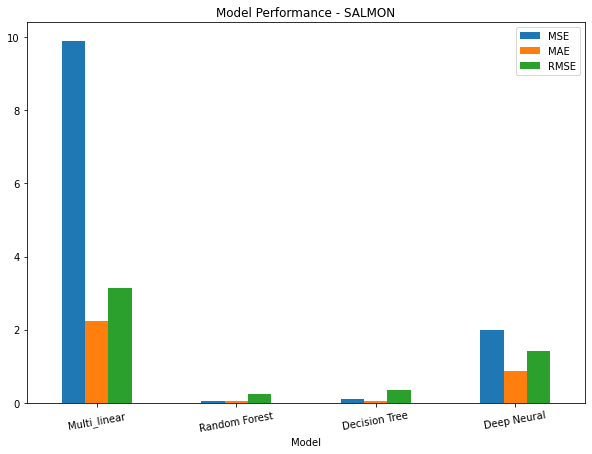

In [97]:
# Bar chart for Salmon models performance
import matplotlib.pyplot as plt
(salmon_dff.loc[ : , salmon_dff.columns != 'R2']).plot.bar(x="Model", rot=10, title="Model Performance - SALMON", figsize=(10, 7));

plt.show(block=True)

### WILBERFORCE001 - Models evaluation

In [98]:
data_wil = {'Model': ['Multi_linear',"Random Forest", "Decision Tree", "Deep Neural"],
        "MSE": [mse_lr3, mse_rf3, mse_dt3, mse_neuraln3 ],
        "MAE": [mae_lr3, mae_rf3, mae_dt3, mae_neuraln3],
        "R2": [r2_lr3, r2_rf3, r2_dt3, r2_neuraln3],
        "RMSE": [rmse_lr3, rmse_rf3, rmse_dt3, rmse_neuraln3]}

wilberforce_dff = pd.DataFrame(data = data_wil)

# display the table of performance comparison
wilberforce_dff.round(2)

,Model,MSE,MAE,R2,RMSE
0,Multi_linear,18.14,3.02,0.66,4.26
1,Random Forest,0.17,0.08,1.00,0.42
2,Decision Tree,0.37,0.08,1.00,0.61
3,Deep Neural,4.94,1.29,0.90,2.22


### Wilberforce- Visualizing the models perfomance for MSE, MAE and RMSE

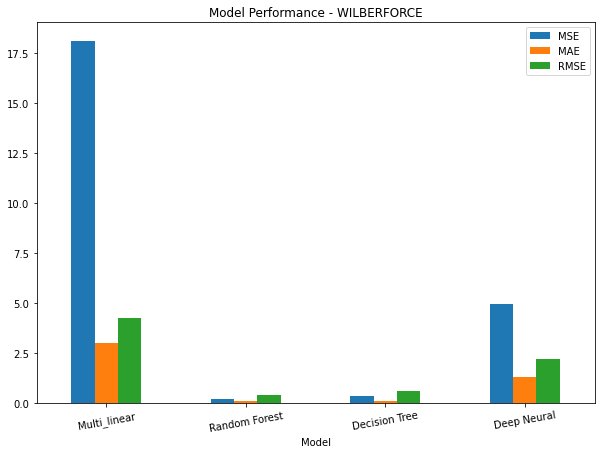

In [99]:
# Bar chart for Wilberforce models performance
import matplotlib.pyplot as plt
(wilberforce_dff.loc[ : , wilberforce_dff.columns != 'R2']).plot.bar(x="Model", rot=10, title="Model Performance - WILBERFORCE", figsize=(10, 7));

plt.show(block=True)

### MODEL PERFORMANCE VISUALISATION (COMBINED CHART)

<AxesSubplot:title={'center':'Model Performance - WILBERFORCE'}, xlabel='Model'>

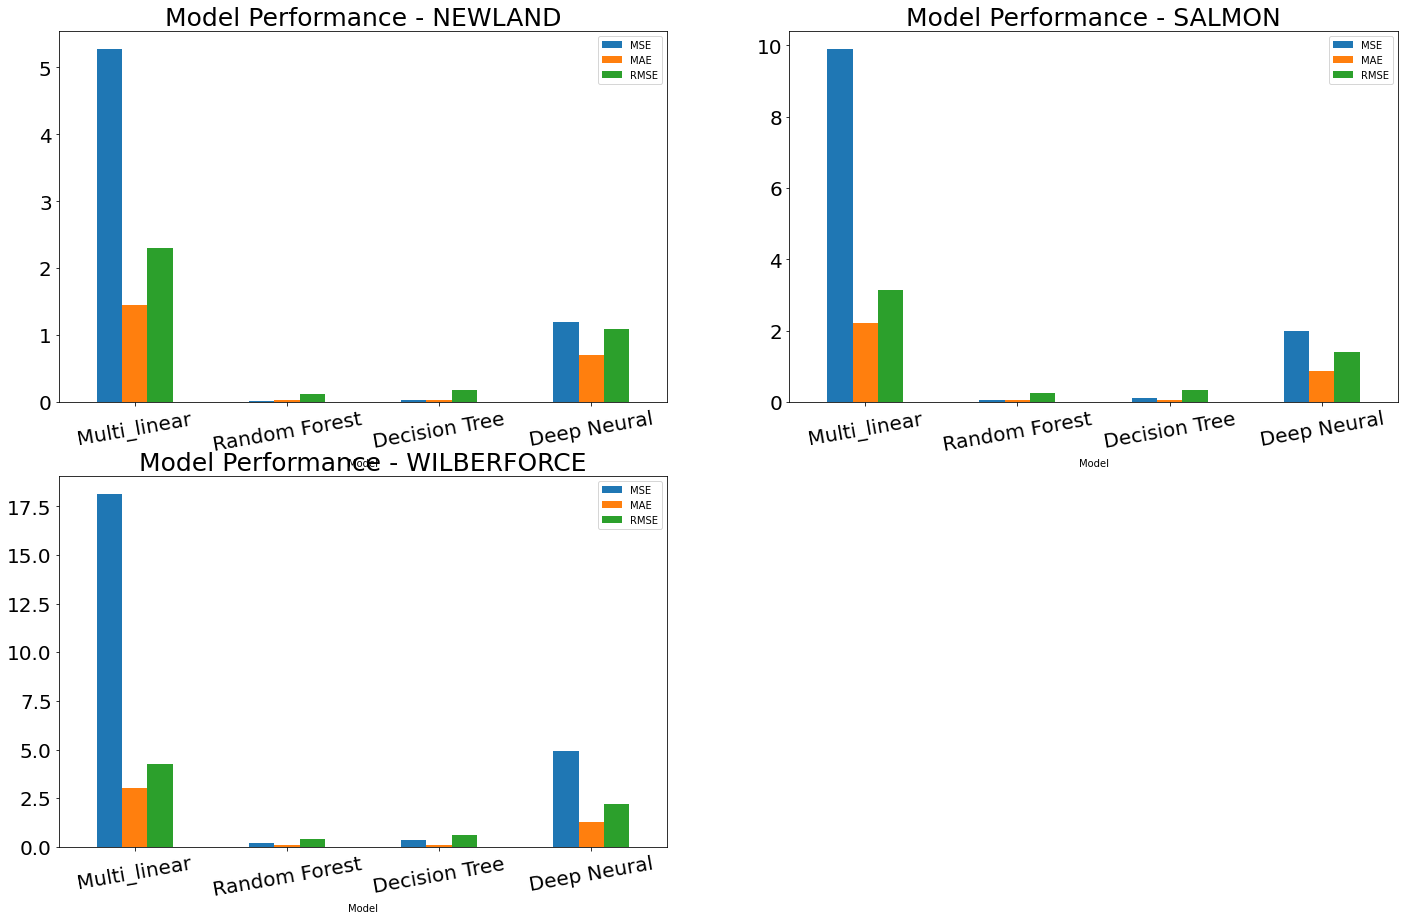

In [100]:
import matplotlib.pyplot as plt
fig = plt.figure() 

ax1 = fig.add_subplot(221)
ax2 =fig.add_subplot(222)
ax3 =fig.add_subplot(223)

ax1.xaxis.set_tick_params(labelsize = 20)
ax1.yaxis.set_tick_params(labelsize = 20)
ax2.xaxis.set_tick_params(labelsize = 20)
ax2.yaxis.set_tick_params(labelsize = 20)
ax3.xaxis.set_tick_params(labelsize = 20)
ax3.yaxis.set_tick_params(labelsize = 20)


ax1.set_title("Model Performance - NEWLAND", fontsize = 25)
ax2.set_title("Model Performance - SALMON", fontsize = 25)
ax3.set_title("Model Performance - WILBERFORCE", fontsize = 25)


(newland_dff.loc[ : , newland_dff.columns != 'R2']).plot.bar(x="Model", rot=10, ax = ax1, figsize=(24, 15))
(salmon_dff.loc[ : , salmon_dff.columns != 'R2']).plot.bar(x="Model", rot=10, ax = ax2, figsize=(24, 15))
(wilberforce_dff.loc[ : , wilberforce_dff.columns != 'R2']).plot.bar(x="Model", rot=10, ax = ax3, figsize=(24, 15))

### PEARSON CORRELATION
We calculated pearson correlation of the dataset variables when grouped monthly. The rainfall variable was totaled before being grouped for our pearson correlation calculation.

### NEWLAND

In [101]:
#grouping all the variables of newland dataset by month, calculating the mean and drop the rain variable
dfn = newland.groupby(['Name_month']).mean()
dfn.drop("Rain - mm", axis = 1, inplace = True)

#grouping rain variable by month and calculating the sum
dfr = newland[["Rain - mm", "Name_month"]].groupby(['Name_month']).sum()
dfr

,Rain - mm
Name_month,
Apr,4.8
Dec,24.4
Feb,81.8
Jan,18.0
Jul,0.0
Jun,20.8
Mar,33.4
May,33.6


In [102]:
#merging dfr and dfn. The idea is to create a dataframe which contains the mean of the variables being grouped monthly.
#However, the rain variable is being calculated for total rainfall per month 
newland_merg = dfr.join(dfn)
newland_merg

,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %,Month
Name_month,,,,,,,,,,,,,,,,,
Apr,4.8,0.002176,32.642645,45.522992,48.416892,51.018050,51.222182,51.204641,11.899537,11.531325,11.509265,10.876007,10.387859,10.287280,9.251424,73.816950,4.0
Dec,24.4,0.017440,36.417964,41.963338,41.997961,44.985864,49.450459,49.789176,7.240103,7.349710,8.024444,7.897437,7.940861,8.370293,7.249516,89.484180,12.0
Feb,81.8,0.083286,44.761384,46.598543,47.855225,50.313588,50.921273,50.975165,6.741506,6.755050,7.220781,6.963501,6.900971,7.080402,7.068010,78.437396,2.0
Jan,18.0,0.010641,42.912153,45.603573,46.459341,49.314292,50.664079,50.664326,5.614908,5.993492,6.799350,6.783658,6.894355,7.272413,5.351322,83.685893,1.0
Jul,0.0,0.000000,5.000000,22.400000,39.200000,46.800000,48.000000,50.200000,17.800000,17.700000,17.300000,16.400000,15.900000,15.500000,13.900000,81.500000,7.0
Jun,20.8,0.015783,7.663701,26.629316,41.139829,47.411560,49.477395,51.032209,16.820505,16.288747,15.946488,15.081902,14.439447,14.176012,15.869104,70.084570,6.0
Mar,33.4,0.017272,45.167407,47.282963,48.993119,51.028668,51.134169,50.991448,9.275000,8.995643,9.135599,8.560178,8.207223,8.253511,8.016431,77.858317,3.0
May,33.6,0.058333,11.904183,35.236604,44.692456,48.901344,50.894506,51.838379,14.964231,14.577576,14.370240,13.577151,12.976647,12.733664,13.429111,73.227671,5.0


In [103]:
#calculating pearson correlation of the newly created dataframe for newland dataset, grouped monthly
newland_merg.corr(method = "pearson").round(2)

,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %,Month
Rain - mm,1.00,0.92,0.46,0.44,0.43,0.31,0.44,0.25,-0.47,-0.49,-0.50,-0.51,-0.52,-0.53,-0.33,-0.04,-0.32
Rain Rate - mm/h,0.92,1.00,0.19,0.26,0.30,0.24,0.41,0.44,-0.25,-0.26,-0.27,-0.27,-0.28,-0.29,-0.11,-0.17,-0.27
Soil Moisture 10 cm - %,0.46,0.19,1.00,0.95,0.77,0.47,0.64,-0.13,-0.95,-0.96,-0.96,-0.97,-0.97,-0.98,-0.95,0.42,-0.37
Soil Moisture 20 cm - %,0.44,0.26,0.95,1.00,0.89,0.59,0.82,0.11,-0.88,-0.90,-0.91,-0.92,-0.93,-0.94,-0.89,0.24,-0.41
Soil Moisture 30 cm - %,0.43,0.30,0.77,0.89,1.00,0.89,0.94,0.48,-0.61,-0.63,-0.66,-0.68,-0.70,-0.73,-0.64,-0.17,-0.70
Soil Moisture 40 cm - %,0.31,0.24,0.47,0.59,0.89,1.00,0.81,0.67,-0.25,-0.27,-0.30,-0.32,-0.35,-0.38,-0.31,-0.48,-0.86
Soil Moisture 50 cm - %,0.44,0.41,0.64,0.82,0.94,0.81,1.00,0.66,-0.52,-0.55,-0.57,-0.59,-0.62,-0.64,-0.50,-0.31,-0.63
Soil Moisture 60 cm - %,0.25,0.44,-0.13,0.11,0.48,0.67,0.66,1.00,0.24,0.22,0.20,0.18,0.14,0.12,0.28,-0.83,-0.58
Soil Temperature 10 cm - °C,-0.47,-0.25,-0.95,-0.88,-0.61,-0.25,-0.52,0.24,1.00,1.00,1.00,0.99,0.99,0.98,0.97,-0.58,0.26
Soil Temperature 20 cm - °C,-0.49,-0.26,-0.96,-0.90,-0.63,-0.27,-0.55,0.22,1.00,1.00,1.00,1.00,0.99,0.99,0.96,-0.55,0.27


## Salmon

In [104]:
#grouping all the variables of salmon dataset by month, calculating the mean and drop the rain variable
dfs = salmon.groupby(['Name_month']).mean()
dfs.drop("Rain - mm", axis = 1, inplace = True)

#grouping rain variable by month and calculating the sum
dfsr = salmon[["Rain - mm", "Name_month"]].groupby(['Name_month']).sum()
dfsr

,Rain - mm
Name_month,
Apr,6.2
Dec,58.4
Feb,82.8
Jan,20.8
Jul,0.0
Jun,29.6
Mar,40.0
May,42.0


In [105]:
#merging dfsr and dfs. The idea is to create a dataframe which contains the mean of the variables being grouped monthly.
#However, the rain variable is being calculated for total rainfall per month 
salmon_merg = dfsr.join(dfs)
salmon_merg

,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %,Month
Name_month,,,,,,,,,,,,,,,,,
Apr,6.2,0.003484,37.199277,38.354855,41.134936,46.077523,43.578964,47.007419,10.186059,9.955214,10.179618,9.882807,9.922037,9.928437,9.251424,73.816950,4.0
Dec,58.4,0.053318,47.386409,34.901592,40.111694,45.152807,43.389692,46.439510,7.250787,7.455474,8.177740,8.321338,8.669969,9.057958,6.542370,88.936250,12.0
Feb,82.8,0.086138,49.668863,38.587514,43.122711,47.131280,44.109266,46.910070,6.402584,6.467605,7.038822,6.995672,7.239955,7.539687,7.068010,78.437396,2.0
Jan,20.8,0.011122,49.279458,37.071248,42.482566,46.308468,43.512797,46.605696,5.763127,6.115631,6.937814,7.042820,7.381933,7.809980,5.351322,83.685893,1.0
Jul,0.0,0.000000,1.800000,3.000000,7.100000,24.100000,34.500000,44.300000,16.500000,16.500000,16.400000,15.900000,15.800000,15.500000,13.900000,81.500000,7.0
Jun,29.6,0.023305,7.094631,9.254634,14.964655,31.457811,37.577806,45.446448,15.364025,14.948941,15.030844,14.485420,14.427031,14.190141,15.869104,70.084570,6.0
Mar,40.0,0.024192,49.255546,41.000965,42.175376,46.409797,43.887489,46.926609,8.051750,7.882229,8.228819,8.003269,8.081987,8.232122,8.016431,77.858317,3.0
May,42.0,0.045957,13.832325,20.710372,29.897905,42.142871,41.892428,46.760417,13.414438,13.013894,13.052733,12.545335,12.544299,12.366773,13.429111,73.227671,5.0


In [107]:
#calculating pearson correlation of the newly created dataframe for salmon dataset, grouped monthly
salmon_merg.corr(method = "pearson").round(2)

,Rain - mm,Rain Rate - mm/h,Soil Moisture 10 cm - %,Soil Moisture 20 cm - %,Soil Moisture 30 cm - %,Soil Moisture 40 cm - %,Soil Moisture 50 cm - %,Soil Moisture 60 cm - %,Soil Temperature 10 cm - °C,Soil Temperature 20 cm - °C,Soil Temperature 30 cm - °C,Soil Temperature 40 cm - °C,Soil Temperature 50 cm - °C,Soil Temperature 60 cm - °C,Air Temp - °C,Humidity - %,Month
Rain - mm,1.00,0.97,0.49,0.43,0.49,0.52,0.53,0.49,-0.53,-0.54,-0.54,-0.54,-0.54,-0.54,-0.38,0.17,0.03
Rain Rate - mm/h,0.97,1.00,0.37,0.33,0.39,0.43,0.45,0.42,-0.42,-0.43,-0.43,-0.43,-0.43,-0.42,-0.28,0.12,0.06
Soil Moisture 10 cm - %,0.49,0.37,1.00,0.96,0.94,0.89,0.89,0.77,-0.98,-0.99,-0.99,-0.99,-0.99,-0.99,-0.96,0.48,-0.28
Soil Moisture 20 cm - %,0.43,0.33,0.96,1.00,0.99,0.96,0.96,0.89,-0.93,-0.94,-0.95,-0.96,-0.96,-0.97,-0.89,0.28,-0.35
Soil Moisture 30 cm - %,0.49,0.39,0.94,0.99,1.00,0.99,0.99,0.93,-0.93,-0.94,-0.95,-0.96,-0.96,-0.97,-0.88,0.28,-0.34
Soil Moisture 40 cm - %,0.52,0.43,0.89,0.96,0.99,1.00,1.00,0.97,-0.88,-0.90,-0.91,-0.92,-0.92,-0.93,-0.80,0.18,-0.34
Soil Moisture 50 cm - %,0.53,0.45,0.89,0.96,0.99,1.00,1.00,0.97,-0.88,-0.90,-0.91,-0.92,-0.93,-0.93,-0.80,0.19,-0.32
Soil Moisture 60 cm - %,0.49,0.42,0.77,0.89,0.93,0.97,0.97,1.00,-0.75,-0.78,-0.79,-0.81,-0.82,-0.83,-0.64,-0.05,-0.39
Soil Temperature 10 cm - °C,-0.53,-0.42,-0.98,-0.93,-0.93,-0.88,-0.88,-0.75,1.00,1.00,1.00,0.99,0.99,0.98,0.97,-0.52,0.30
Soil Temperature 20 cm - °C,-0.54,-0.43,-0.99,-0.94,-0.94,-0.90,-0.90,-0.78,1.00,1.00,1.00,1.00,1.00,0.99,0.96,-0.48,0.31


## Model Testing
Checking for the predicted values on the feature variables using our models.

## Function 4 (Model Testing/Prediction/Visualization)
Here we will be creating a function to test the models we developed on our datasets. This will allow us see how well our model predicts and also visualize the outcome and make comparison between actual and predicted values.

In [108]:
#Building a function to test our built model
def model_testing(data, built_model):
    
    """
    Model testing using the features

    data: dataframe of the station
    built model: an already trained model
    actual values: the actual values of the target variables
    predicted values: the values predicted by our model
    """ 
    
    target_predicted = ["Soil M 10 cm (Predicted)", "Soil M 20 cm (Predicted)", "Soil M 30 cm (Predicted)", 
                      "Soil M 40 cm (Predicted)", "Soil M 50 cm (Predicted)", "Soil M 60 cm (Predicted)"]
    
    data.rename(columns = {"Soil Moisture 10 cm - %" : "Soil M 10 cm (Actual)", "Soil Moisture 20 cm - %" : "Soil M 20 cm (Actual)",
         "Soil Moisture 30 cm - %": "Soil M 30 cm (Actual)", "Soil Moisture 40 cm - %" : "Soil M 40 cm (Actual)", 
        "Soil Moisture 50 cm - %": "Soil M 50 cm (Actual)", "Soil Moisture 60 cm - %": "Soil M 60 cm (Actual)"}, inplace = True)
    
    #target_var = ["Soil Moisture 10 cm - %", "Soil Moisture 20 cm - %", "Soil Moisture 30 cm - %", 
                      #"Soil Moisture 40 cm - %", "Soil Moisture 50 cm - %", "Soil Moisture 60 cm - %"]
        
    target_var = ["Soil M 10 cm (Actual)", "Soil M 20 cm (Actual)", "Soil M 30 cm (Actual)", 
                      "Soil M 40 cm (Actual)", "Soil M 50 cm (Actual)", "Soil M 60 cm (Actual)"]
    
    #separating our input variables and output variables from our station dataset
    input_var = data.drop(target_var, axis = 1)
    actual_values = data[target_var]
    
    #normalizing the data
    scaler = MinMaxScaler()
    input_var = scaler.fit_transform(input_var)
    
    #carrying out prediction using our newly built model on the input variable of out dataset
    prediction_of_input = built_model.predict(input_var)
    numpy_array_values = np.array(prediction_of_input)
    predicted_values = pd.DataFrame(numpy_array_values, columns = target_predicted)
    predicted_values.index = actual_values.index
    
    return actual_values, predicted_values

# NEWLAND PREDICTED VALUES PLOTS WITH THE MODELS

In [109]:
newland_df = newland.drop(["Month", "Name_month"] , axis = 1)
newland_df.set_index("Date & Time", inplace = True)

## Multilinear Regression

In [110]:
#calling on our model_testing function
actual_values_newland_lr1, predicted_values_newland_lr1 =  model_testing(newland_df, model_lr1)

<AxesSubplot:title={'center':'Actual SM Values for Newland dataset'}, xlabel='Date & Time'>

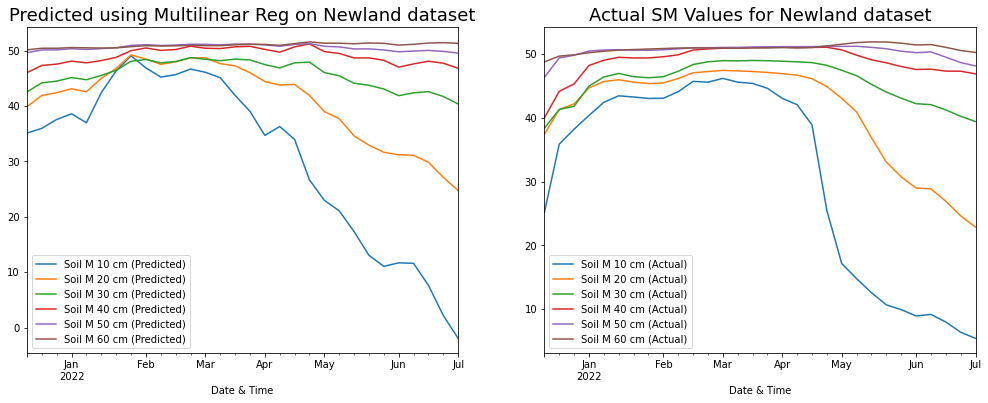

In [111]:
predicted_values_newland_lr1.reset_index("Date & Time", inplace = True)
actual_values_newland_lr1.reset_index("Date & Time", inplace = True)


fig = plt.figure() 

ax1 = fig.add_subplot(121)
ax2 =fig.add_subplot(122)

ax1.set_title('Predicted using Multilinear Reg on Newland dataset', fontsize = 18)
ax2.set_title('Actual SM Values for Newland dataset', fontsize = 18)

predicted_values_newland_lr1[["Soil M 10 cm (Predicted)", "Soil M 20 cm (Predicted)", "Soil M 30 cm (Predicted)", "Soil M 40 cm (Predicted)", "Soil M 50 cm (Predicted)", "Soil M 60 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(17, 6))
actual_values_newland_lr1[["Soil M 10 cm (Actual)", "Soil M 20 cm (Actual)", "Soil M 30 cm (Actual)","Soil M 40 cm (Actual)", "Soil M 50 cm (Actual)", "Soil M 60 cm (Actual)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax2, figsize=(17, 6))

## Random Forest regression

In [112]:
#calling on our model_testing function
actual_values_newland_rf1, predicted_values_newland_rf1 =  model_testing(newland_df, model_rf1)

In [113]:
#printing first five rows
actual_values_newland_rf1.head()

,Soil M 10 cm (Actual),Soil M 20 cm (Actual),Soil M 30 cm (Actual),Soil M 40 cm (Actual),Soil M 50 cm (Actual),Soil M 60 cm (Actual)
Date & Time,,,,,,
2021-12-10 11:00:00,20.2,36.8,38.3,38.6,43.8,46.9
2021-12-10 11:05:00,20.2,36.8,38.3,38.6,43.8,47.0
2021-12-10 11:10:00,20.2,36.8,38.3,38.6,43.8,47.1
2021-12-10 11:15:00,20.2,36.8,38.3,38.6,43.9,47.1
2021-12-10 11:20:00,20.2,36.8,38.4,38.6,43.9,47.2


In [114]:
#printing first five rows
predicted_values_newland_rf1.head().round(2)

,Soil M 10 cm (Predicted),Soil M 20 cm (Predicted),Soil M 30 cm (Predicted),Soil M 40 cm (Predicted),Soil M 50 cm (Predicted),Soil M 60 cm (Predicted)
Date & Time,,,,,,
2021-12-10 11:00:00,20.38,36.84,38.34,38.67,43.92,47.12
2021-12-10 11:05:00,20.20,36.80,38.31,38.60,43.85,47.09
2021-12-10 11:10:00,20.20,36.80,38.31,38.60,43.85,47.11
2021-12-10 11:15:00,20.20,36.80,38.32,38.60,43.91,47.14
2021-12-10 11:20:00,26.45,38.43,39.55,40.91,46.05,48.18


<AxesSubplot:title={'center':'Actual SM Values for Newland dataset'}, xlabel='Date & Time'>

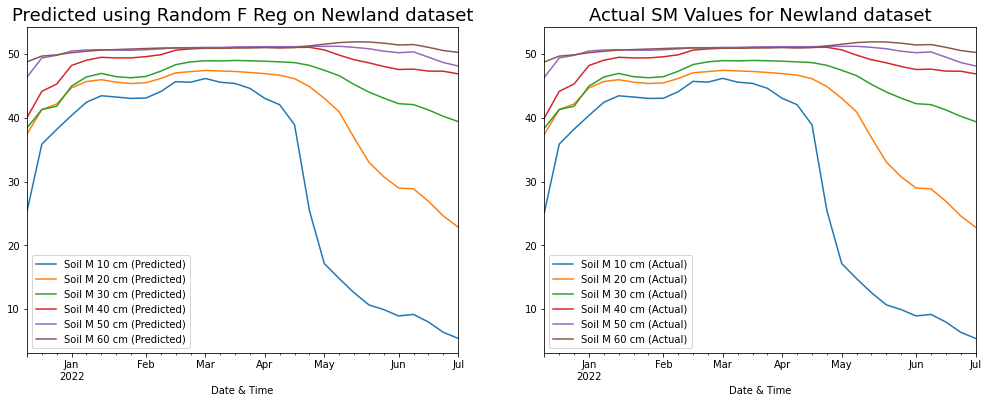

In [115]:
predicted_values_newland_rf1.reset_index("Date & Time", inplace = True)
actual_values_newland_rf1.reset_index("Date & Time", inplace = True)


fig = plt.figure() 

ax1 = fig.add_subplot(121)
ax2 =fig.add_subplot(122)

ax1.set_title('Predicted using Random F Reg on Newland dataset', fontsize = 18)
ax2.set_title('Actual SM Values for Newland dataset', fontsize = 18)

predicted_values_newland_rf1[["Soil M 10 cm (Predicted)", "Soil M 20 cm (Predicted)", "Soil M 30 cm (Predicted)", "Soil M 40 cm (Predicted)", "Soil M 50 cm (Predicted)", "Soil M 60 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(17, 6))
actual_values_newland_rf1[["Soil M 10 cm (Actual)", "Soil M 20 cm (Actual)", "Soil M 30 cm (Actual)","Soil M 40 cm (Actual)", "Soil M 50 cm (Actual)", "Soil M 60 cm (Actual)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax2, figsize=(17, 6))

## Decision Tree Regression

In [116]:
#calling on our model_testing function
actual_values_newland_dt1, predicted_values_newland_dt1 =  model_testing(newland_df, model_dt1)

<AxesSubplot:title={'center':'Actual SM Values for Newland dataset'}, xlabel='Date & Time'>

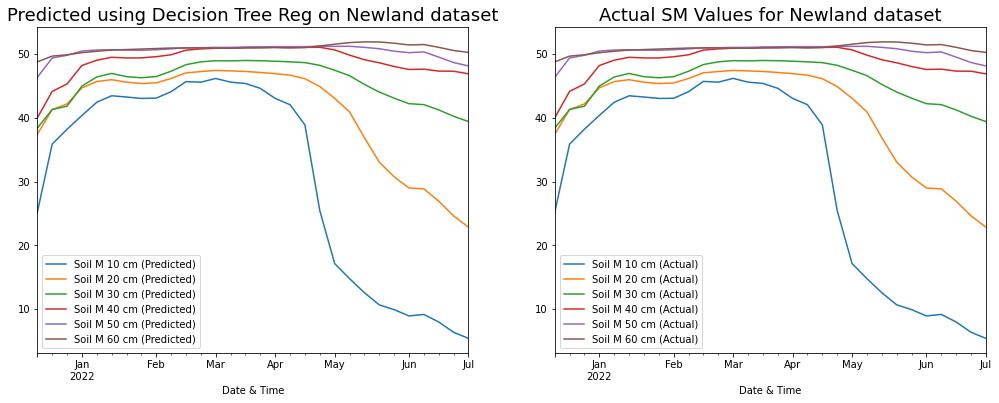

In [117]:
predicted_values_newland_dt1.reset_index("Date & Time", inplace = True)
actual_values_newland_dt1.reset_index("Date & Time", inplace = True)


fig = plt.figure() 

ax1 = fig.add_subplot(121)
ax2 =fig.add_subplot(122)

ax1.set_title('Predicted using Decision Tree Reg on Newland dataset', fontsize = 18)
ax2.set_title('Actual SM Values for Newland dataset', fontsize = 18)

predicted_values_newland_dt1[["Soil M 10 cm (Predicted)", "Soil M 20 cm (Predicted)", "Soil M 30 cm (Predicted)", "Soil M 40 cm (Predicted)", "Soil M 50 cm (Predicted)", "Soil M 60 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(17, 6))
actual_values_newland_dt1[["Soil M 10 cm (Actual)", "Soil M 20 cm (Actual)", "Soil M 30 cm (Actual)","Soil M 40 cm (Actual)", "Soil M 50 cm (Actual)", "Soil M 60 cm (Actual)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax2, figsize=(17, 6))

## Deep Neural Regression

In [118]:
#calling on our model_testing function
actual_values_newland_n1, predicted_values_newland_n1 =  model_testing(newland_df, model_n1)

1822/1822 [==============================] - 3s 1ms/step


<AxesSubplot:title={'center':'Actual SM Values for Newland dataset'}, xlabel='Date & Time'>

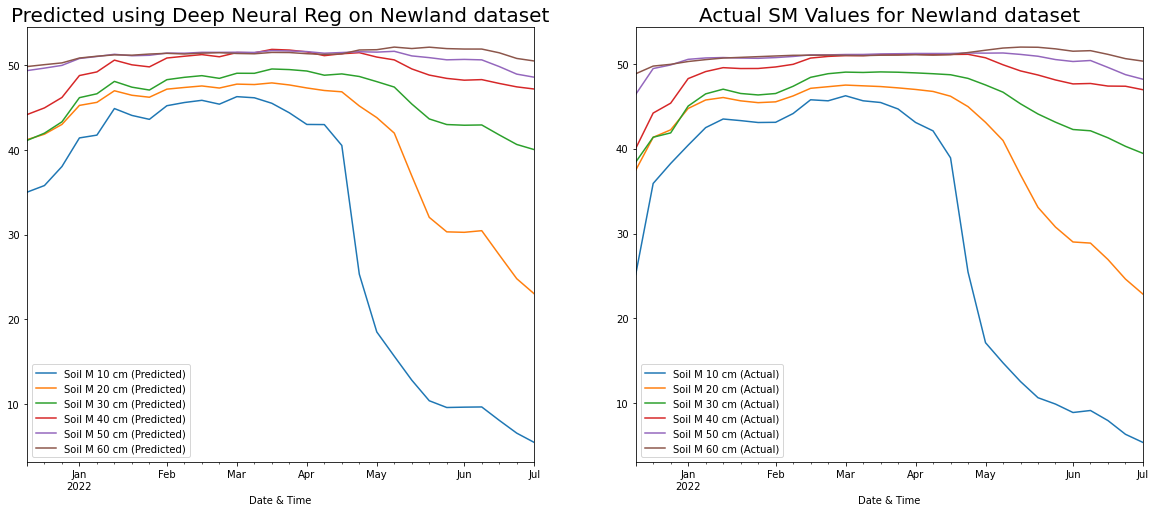

In [119]:
predicted_values_newland_n1.reset_index("Date & Time", inplace = True)
actual_values_newland_n1.reset_index("Date & Time", inplace = True)


fig = plt.figure() 

ax1 = fig.add_subplot(121)
ax2 =fig.add_subplot(122)

ax1.set_title('Predicted using Deep Neural Reg on Newland dataset', fontsize = 20)
ax2.set_title('Actual SM Values for Newland dataset', fontsize = 20)

predicted_values_newland_n1[["Soil M 10 cm (Predicted)", "Soil M 20 cm (Predicted)", "Soil M 30 cm (Predicted)", "Soil M 40 cm (Predicted)", "Soil M 50 cm (Predicted)", "Soil M 60 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(20, 8))
actual_values_newland_n1[["Soil M 10 cm (Actual)", "Soil M 20 cm (Actual)", "Soil M 30 cm (Actual)","Soil M 40 cm (Actual)", "Soil M 50 cm (Actual)", "Soil M 60 cm (Actual)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax2, figsize=(20, 8))

# VISUALIZING ONLY 30CM DEPTH

## Deep Neural Regression

<AxesSubplot:title={'center':'Predicted & Actual using Deep Neural Reg on Newland dataset'}, xlabel='Date & Time'>

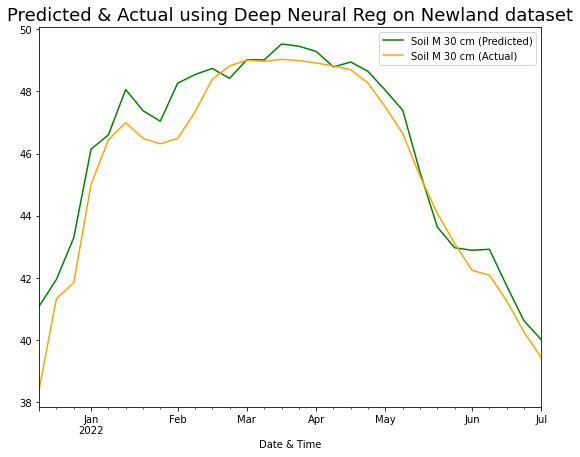

In [121]:
#predicted_values_newland_n1.reset_index("Date & Time", inplace = True)
#actual_values_newland_n1.reset_index("Date & Time", inplace = True)


fig = plt.figure() 

ax1 = fig.add_subplot(111)
ax1.set_title('Predicted & Actual using Deep Neural Reg on Newland dataset', fontsize = 18)

#predicted_values_newland_n1[["Soil M 10 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(10, 6), color='black')
predicted_values_newland_n1[["Soil M 30 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(9, 7), color='green')
#actual_values_newland_n1[["Soil Moisture 10 cm - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(17, 6),color='red')
actual_values_newland_n1[["Soil M 30 cm (Actual)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(9, 7),color='orange')

## Multilinear Regression

<AxesSubplot:title={'center':'Predicted & Actual using Multilinear Reg on Newland dataset'}, xlabel='Date & Time'>

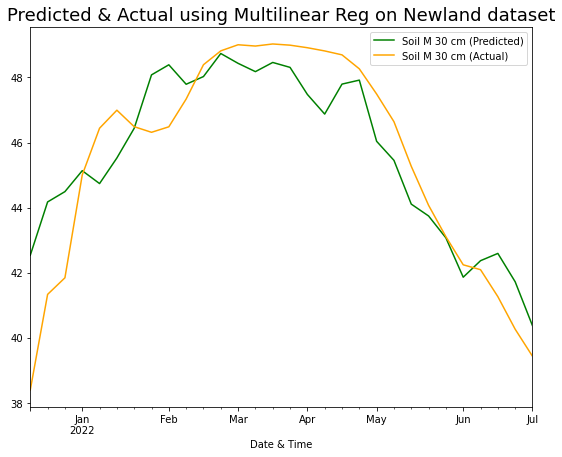

In [122]:
#predicted_values_newland_lr1.reset_index("Date & Time", inplace = True)
#actual_values_newland_lr1.reset_index("Date & Time", inplace = True)


fig = plt.figure() 

ax1 = fig.add_subplot(111)
ax1.set_title('Predicted & Actual using Multilinear Reg on Newland dataset', fontsize = 18)


#predicted_values_newland_lr1[["Soil M 10 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(17, 6), color='black')
predicted_values_newland_lr1[["Soil M 30 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(9, 7), color='green')
#actual_values_newland_lr1[["Soil Moisture 10 cm - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(17, 6),color='red')
actual_values_newland_lr1[["Soil M 30 cm (Actual)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(9, 7),color='orange')

## Random Forest Regression

<AxesSubplot:title={'center':'Predicted & Actual using Random F Reg on Newland dataset'}, xlabel='Date & Time'>

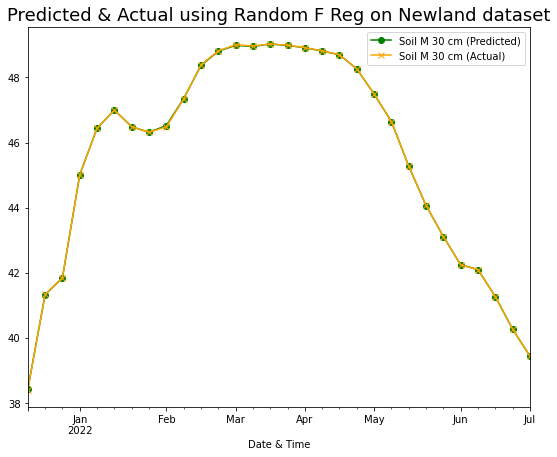

In [123]:
#predicted_values_newland_rf1.reset_index("Date & Time", inplace = True)
#actual_values_newland_rf1.reset_index("Date & Time", inplace = True)


fig = plt.figure() 

ax1 = fig.add_subplot(111)
ax1.set_title('Predicted & Actual using Random F Reg on Newland dataset', fontsize = 18)


#predicted_values_newland_rf1[["Soil M 10 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time', freq='W')).mean().plot(ax = ax1, figsize=(17, 6), color='black', marker='<')
predicted_values_newland_rf1[["Soil M 30 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time', freq='W')).mean().plot(ax = ax1, figsize=(9, 7), color='green', marker='o')
#actual_values_newland_rf1[["Soil Moisture 10 cm - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(17, 6),color='red', marker='>')
actual_values_newland_rf1[["Soil M 30 cm (Actual)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(9, 7),color='orange', marker='x')

## Decision Tree Regression

<AxesSubplot:title={'center':'Predicted & Actual using Decision Tree Reg on Newland dataset'}, xlabel='Date & Time'>

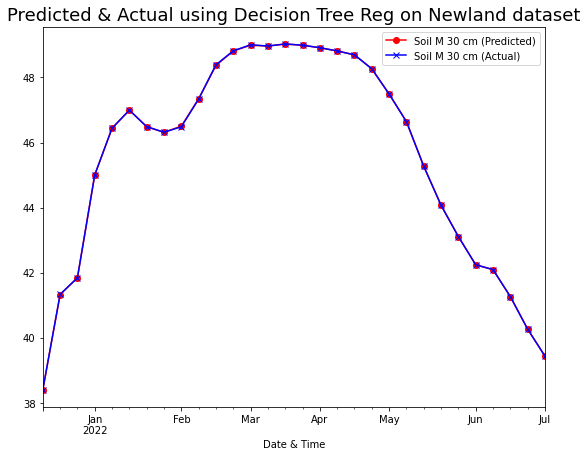

In [124]:
#predicted_values_newland_lr1.reset_index("Date & Time", inplace = True)
#actual_values_newland_lr1.reset_index("Date & Time", inplace = True)


fig = plt.figure() 

ax1 = fig.add_subplot(111)
ax1.set_title('Predicted & Actual using Decision Tree Reg on Newland dataset', fontsize = 18)


#predicted_values_newland_dt1[["Soil M 10 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(17, 6), color='blue', marker='<')
predicted_values_newland_dt1[["Soil M 30 cm (Predicted)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(9, 7), color='red', marker='o')
#actual_values_newland_dt1[["Soil Moisture 10 cm - %", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(17, 6),color='red', marker='>')
actual_values_newland_dt1[["Soil M 30 cm (Actual)", 'Date & Time']].groupby(pd.Grouper(key='Date & Time',freq='W')).mean().plot(ax = ax1, figsize=(9, 7),color='blue', marker='x')